#    **NLI-PT (all features)**





In [2]:
import csv
import numpy as np
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# **1. Preprocess output from CTAP**

*The NLI-PT corpus was divided in two batches to be processed in in CTAP



In [ ]:
df1 = pd.read_csv("NLI-PT_V3_1_new.csv", encoding= 'unicode_escape')

In [ ]:
df2 = pd.read_csv("NLI-PT_V3_2_new.csv", encoding= 'unicode_escape')

In [ ]:
df2.head()

Text_Title  \
0  ita_B_PA_2_22_60.2M_lei.txt   
1  ita_B_PA_2_22_60.2M_lei.txt   
2  ita_B_PA_2_22_60.2M_lei.txt   
3  ita_B_PA_2_22_60.2M_lei.txt   
4  ita_B_PA_2_22_60.2M_lei.txt   

                                        Feature_Name Value  Unnamed: 3  
0  Dependency Locality Theory: Maximal IC at Fini...     0         NaN  
1  Dependency Locality Theory: Total IC at Finite...     2         NaN  
2  Dependency Locality Theory: Total IC at Finite...     1         NaN  
3  Dependency Locality Theory: Maximal IC at Fini...     0         NaN  
4  Dependency Locality Theory: Total IC at Finite...     2         NaN

In [ ]:
frames = df1, df2

In [ ]:
# Join the separated batches
df = pd.concat(frames)

In [ ]:
# Pivot the dataframe so each feature is a column
df = df.pivot_table(index='Text_Title', columns='Feature_Name', values='Value', aggfunc='first').reset_index()

In [ ]:
df.head()

Feature_Name              Text_Title  \
0             ara_A_006CAETF_cop.txt   
1             ara_A_006CAETI_cop.txt   
2             ara_A_007CVITI_cop.txt   
3             ara_A_008CVETD_cop.txt   
4             ara_A_008CVETF_cop.txt   

Feature_Name Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                             0.043165467625899                   
1                                             0.073170731707317                   
2                                             0.020408163265306                   
3                                                           0.1                   
4                                             0.100529100529101                   

Feature_Name Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                             0.086330935251799              
1                                             0.186991869918699              
2                                             0.040816326530612              
3                                             0.111111111111111              
4                                             0.148148148148148              

Feature_Name Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                                             0                 
1                                             0.008130081300813                 
2                                                             0                 
3                                                             0                 
4                                                             0                 

Feature_Name Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                             0                     
1                                                             0                     
2                                                             0                     
3                                                             0                     
4                                                             0                     

Feature_Name Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives  \
0                                                             0                      
1                                                             0                      
2                                                             0                      
3                                                             0                      
4                                                             0                      

Feature_Name Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective  \
0                                                             0                          
1                                                             0                          
2                                                             0                          
3                                                             0                          
4                                                             0                          

Feature_Name Cohesive Complexity Feature: Mendes Other Connectives per Token  \
0                                                             0                
1                                                             0                
2                                                             0                
3                                                             0                
4                                                             0                

Feature_Name Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective  \
0                                                             1                           
1                                                             1         

In [ ]:
len(df)

3068

In [ ]:
# Extract L1's from file names
def label_l1 (row):
  if row['Text_Title'].startswith('ara'):
    return '1'
  if row['Text_Title'].startswith('chi'):
    return '2'    
  if row['Text_Title'].startswith('dut'):
    return '3'        
  if row['Text_Title'].startswith('eng'):
    return '4'
  if row['Text_Title'].startswith('fre'):
    return '5'    
  if row['Text_Title'].startswith('ger'):
    return '6'
  if row['Text_Title'].startswith('ita'):
    return '7'    
  if row['Text_Title'].startswith('jap'):
    return '8'        
  if row['Text_Title'].startswith('kor'):
    return '9'
  if row['Text_Title'].startswith('pol'):
    return '10'    
  if row['Text_Title'].startswith('rom'):
    return '11'    
  if row['Text_Title'].startswith('rus'):
    return '12'            
  if row['Text_Title'].startswith('spa'):
    return '13'        
  if row['Text_Title'].startswith('swe'):
    return '14'    
  if row['Text_Title'].startswith('tet'):
    return '15'            

In [ ]:
# Add L1's as new feature
df['L1'] = df.apply (lambda row: label_l1(row), axis=1)

In [ ]:
# Extract proficiency levels from file names
def proficiency(row):
  if '_A_' in row['Text_Title']:
    return '1'
  if '_B_' in row['Text_Title']:
    return '2'
  if '_C_' in row['Text_Title']:
    return '3' 

In [ ]:
# Add proficiency levels as new feature
df['Proficiency'] = df.apply (lambda row: proficiency(row), axis=1)

In [ ]:
df.head()

ï»¿              Text_Title  \
0    0  ara_A_006CAETF_cop.txt   
1    1  ara_A_006CAETI_cop.txt   
2    2  ara_A_007CVITI_cop.txt   
3    3  ara_A_008CVETD_cop.txt   
4    4  ara_A_008CVETF_cop.txt   

   Cohesive Complexity Feature: Mendes Additive Connectives per Token  \
0                                           0.043165                    
1                                           0.073171                    
2                                           0.020408                    
3                                           0.100000                    
4                                           0.100529                    

   Cohesive Complexity Feature: Mendes All Connectives per Token  \
0                                           0.086331               
1                                           0.186992               
2                                           0.040816               
3                                           0.111111               
4                                           0.148148               

   Cohesive Complexity Feature: Mendes Causal Connectives per Token  \
0                                            0.00000                  
1                                            0.00813                  
2                                            0.00000                  
3                                            0.00000                  
4                                            0.00000                  

   Cohesive Complexity Feature: Mendes Concessive Connectives per Token  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Cohesive Complexity Feature: Mendes Other Connectives per Token  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective  \
0                                                  1                            
1                                                  1                            
2                                                  1                            
3                                                  1                            
4                                                  1                            

   ...  Syntactic Complexity Feature: Verb Cluster per Clause  \
0  ...                                           0.300000       
1  ...                                           0.266667       
2  ...                         

In [ ]:
# Check for null values and drop them
df.isnull().sum().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Number of rows left
len(df)

2753

In [ ]:
df = df.drop('ï»¿', axis=1)

In [ ]:
# Save new formatted data frame
df.to_csv('NLI-PT_all_features_new_noNaN.csv', encoding = 'utf-8-sig') 
files.download('NLI-PT_all_features_new_noNaN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **2. Data Visualization**



In [3]:
df = pd.read_csv("NLI-PT_all_features_new_noNaN.csv", encoding= 'unicode_escape')

In [8]:
# Get all feature names
a = df.columns.tolist()
a

['ï»¿',
 'Text_Title',
 'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
 'Cohesive Complexity Feature: Mendes All Connectives per Token',
 'Cohesive Complexity Feature: Mendes Causal Connectives per Token',
 'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
 'Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives',
 'Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective',
 'Cohesive Complexity Feature: Mendes Other Connectives per Token',
 'Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective',
 'Cohesive Complexity Feature: Mendes Single-Word Connectives per Token',
 'Cohesive Complexity Feature: Mendes Temporal Connectives per Token',
 'Dependency Locality Theory: High Adjacent IC at Finite Verb (higher verb weight)',
 'Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight + added verb weight)',
 'Dependency Locality Theory: High Adjacent IC at Finite V

* **Separate feature samples by group for visualization**

In [10]:
surface_counts = ['Number of Tokens', 
                'Number of Sentences', 
                'Number of Word Types', 
                'Number of Word Types with More Than 2 Syllables',
                'Mean Sentence Length in Tokens', 
                'Mean Token Length in Syllables',                
                'Lexical Richness: Type Token Ratio (TTR)',
                'Lexical Richness: Type Token Ratio (Corrected TTR)',
                ]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


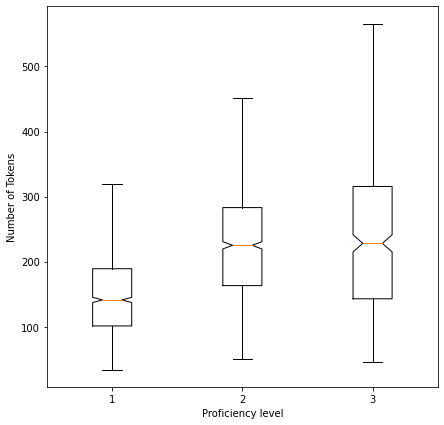

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


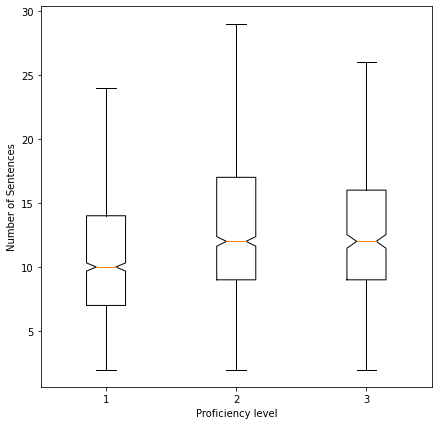

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


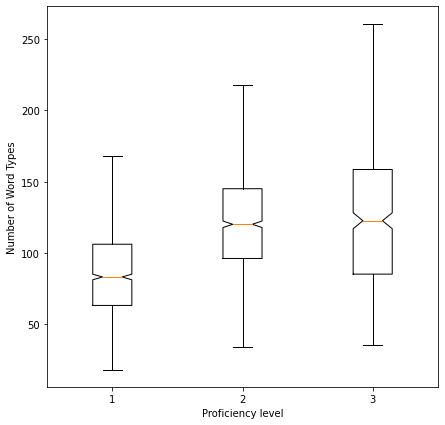

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


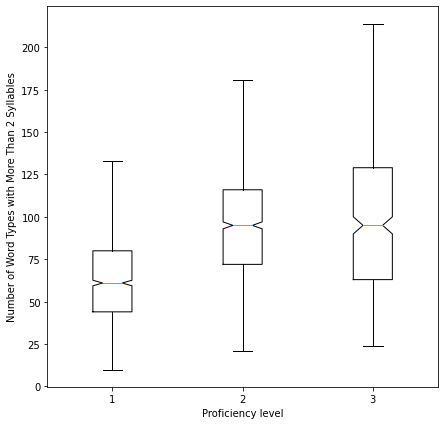

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


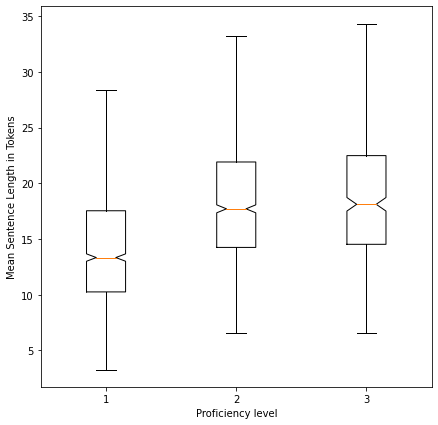

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


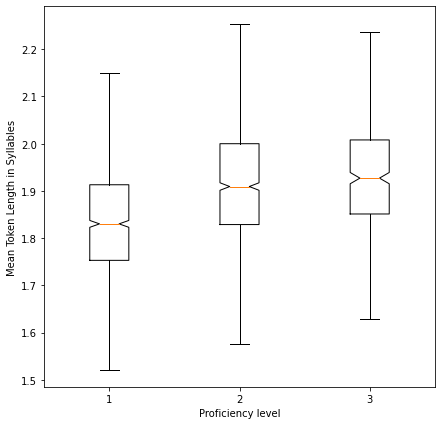

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


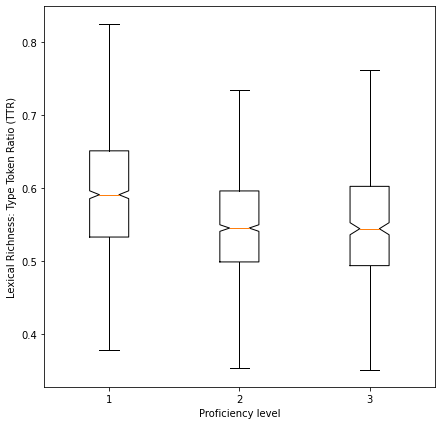

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


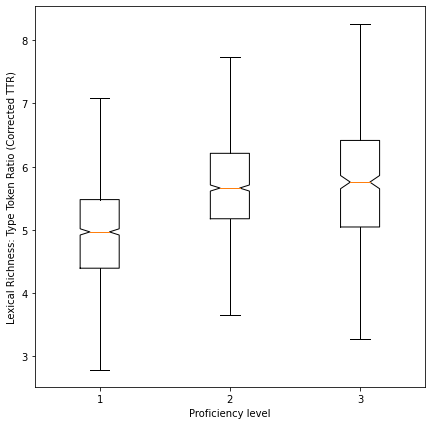

In [13]:
for feature in surface_counts:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=False)
  plt.show()

Number of Tokens


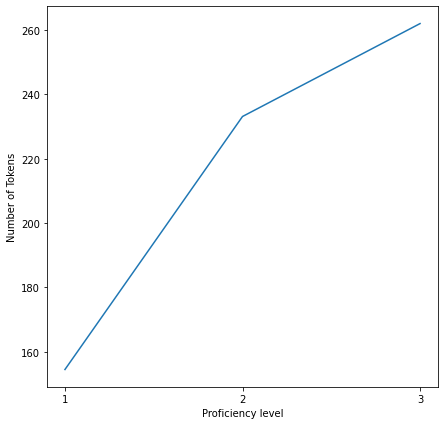

 
Number of Sentences


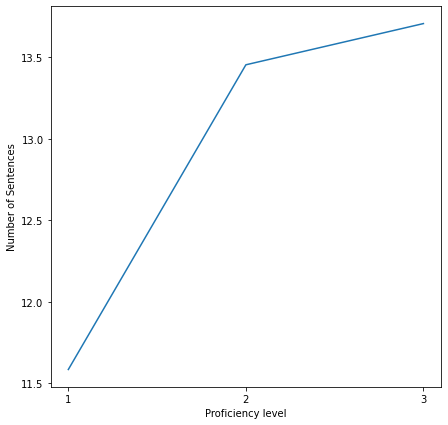

 
Number of Word Types


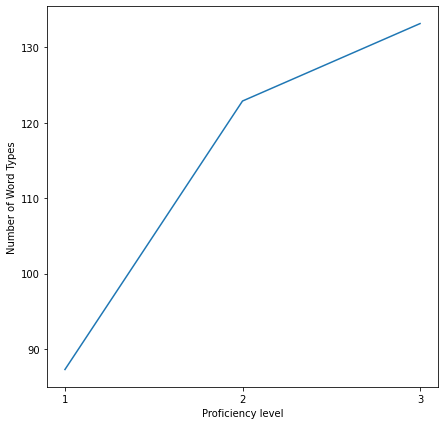

 
Number of Word Types with More Than 2 Syllables


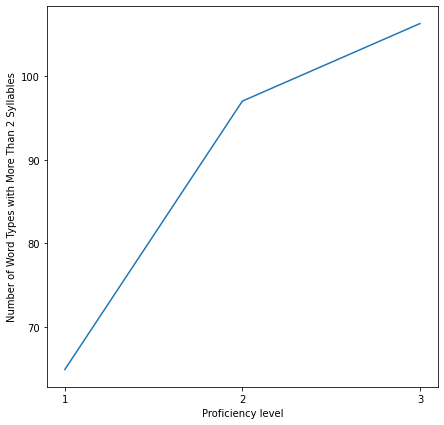

 
Mean Sentence Length in Tokens


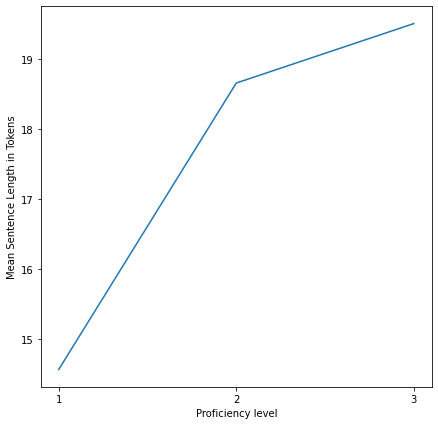

 
Mean Token Length in Syllables


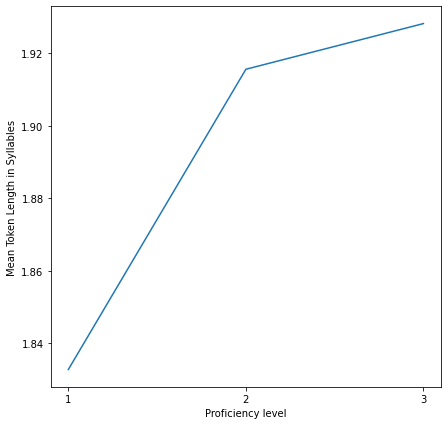

 
Lexical Richness: Type Token Ratio (TTR)


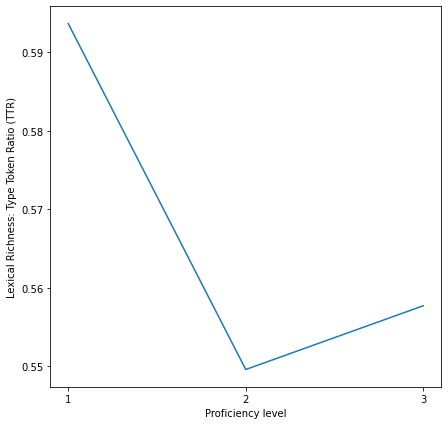

 
Lexical Richness: Type Token Ratio (Corrected TTR)


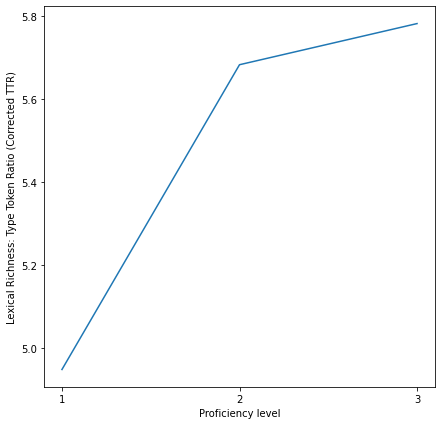

In [31]:
for feature in surface_counts:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [32]:
POS_features = ['Lexical Variation Feature: Adjective',
'Lexical Variation Feature: Adverb',
'Lexical Variation Feature: Corrected Verb Variation 1',
'Lexical Variation Feature: Lexical',
'Lexical Variation Feature: Noun',
'Lexical Variation Feature: Verb',
'Number of POS Feature: Adjective Tokens',
'Number of POS Feature: Adverb Tokens',
'Number of POS Feature: Lexical word Tokens',
'Number of POS Feature: Noun Tokens',
'Number of POS Feature: Punctuation Tokens',
'POS Density Feature: Article',
'POS Density Feature: Auxiliary Verb',
'POS Density Feature: Conjunction',
'POS Density Feature: Coordinating Conjunction',
'POS Density Feature: Determiner',
'POS Density Feature: Functional Words',
'POS Density Feature: Interjection',
'POS Density Feature: Lexical Words',
'POS Density Feature: Modifier',
'POS Density Feature: Noun',
'POS Density Feature: Preposition',
'POS Density Feature: Pronoun',
'POS Density Feature: Proper Noun',
'POS Density Feature: Subordinating Conjunction'
]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


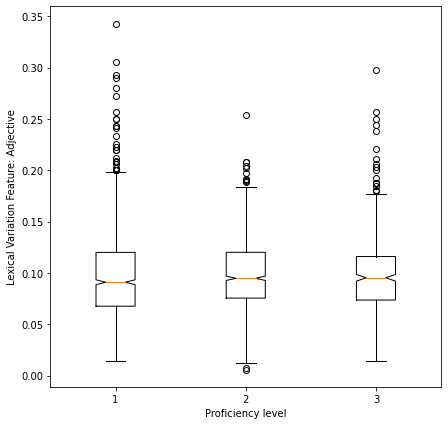

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


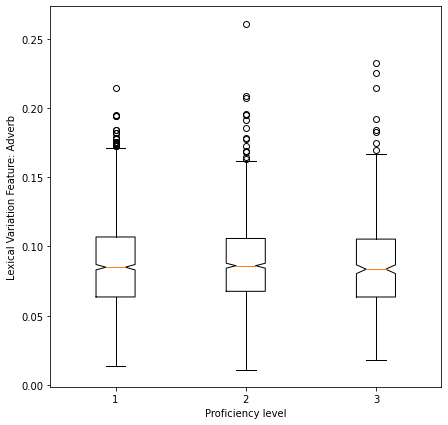

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


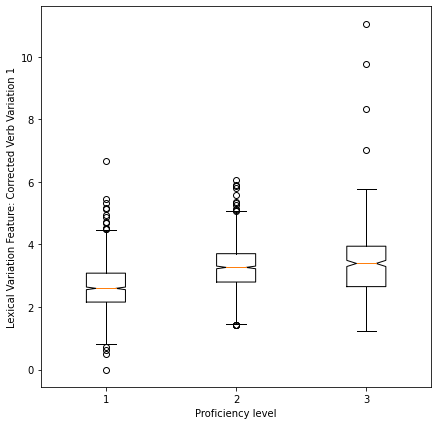

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


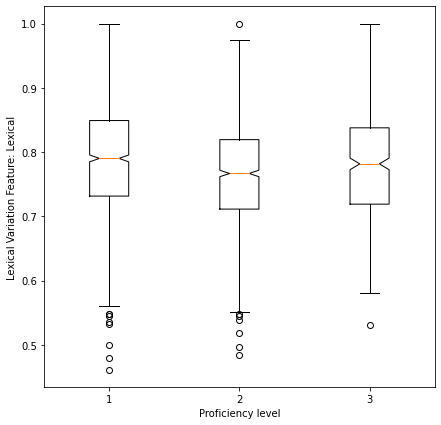

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


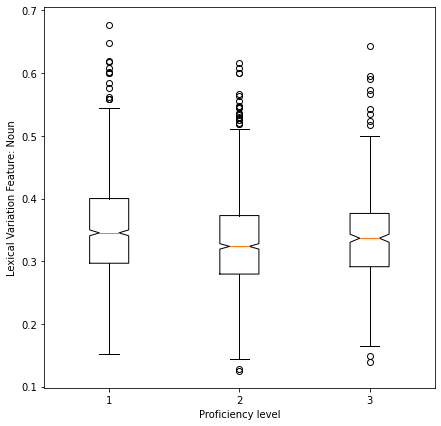

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


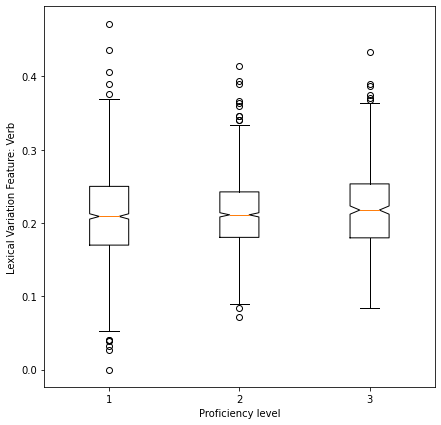

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


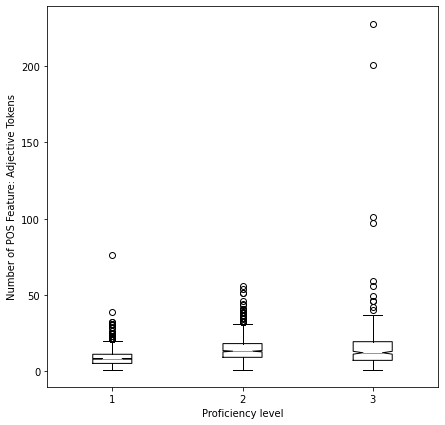

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


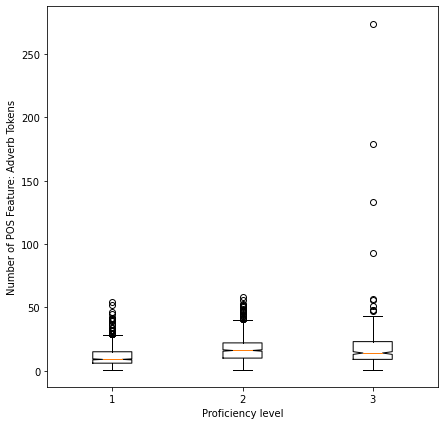

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


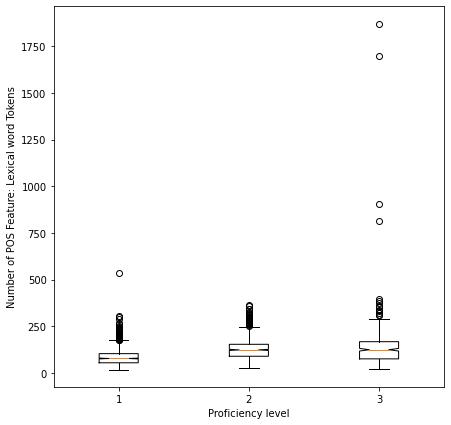

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


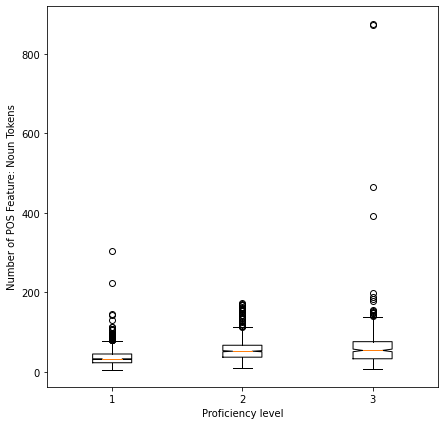

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


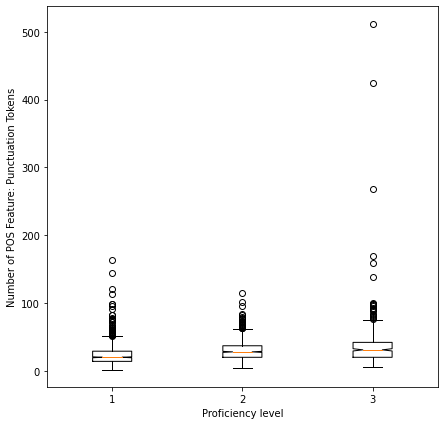

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


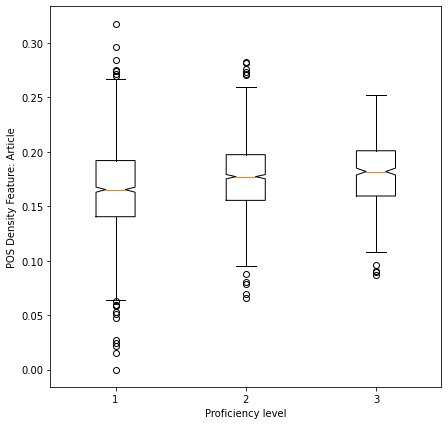

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


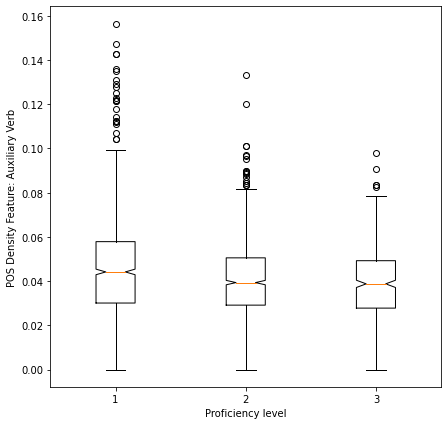

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


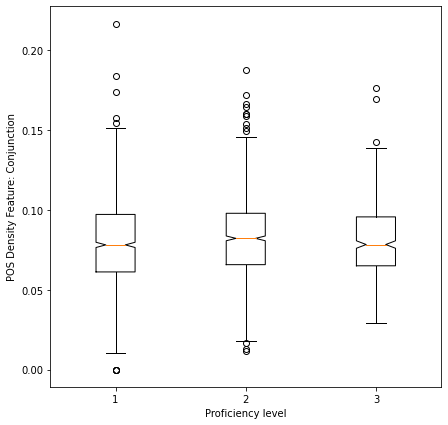

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


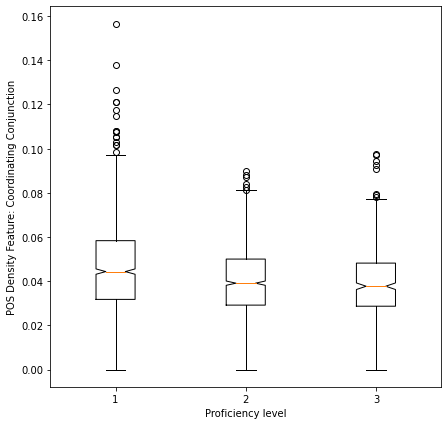

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


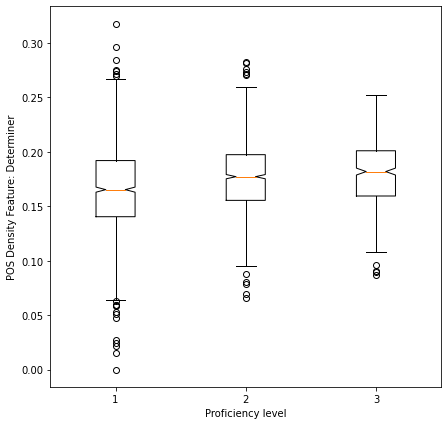

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


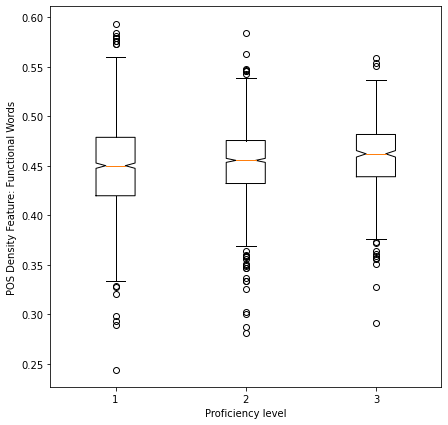

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


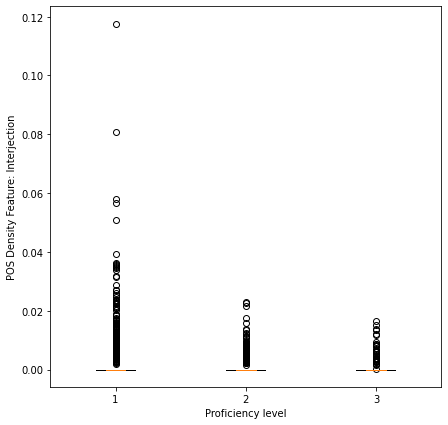

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


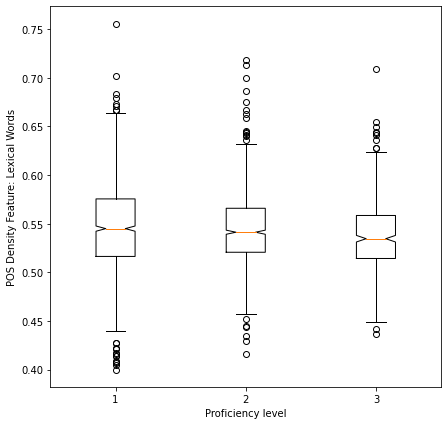

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


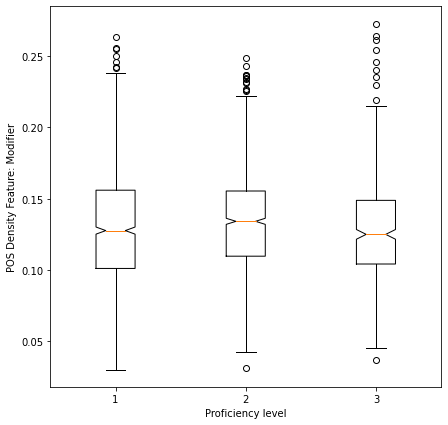

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


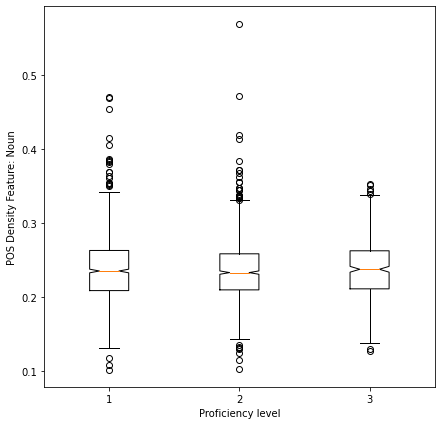

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


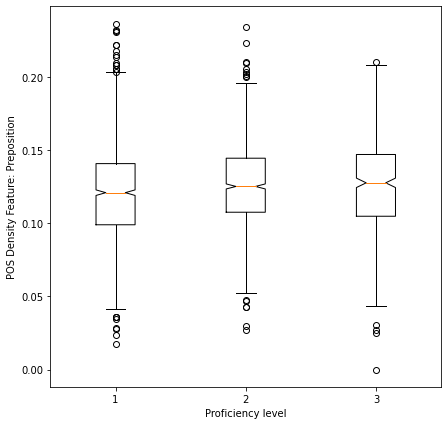

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


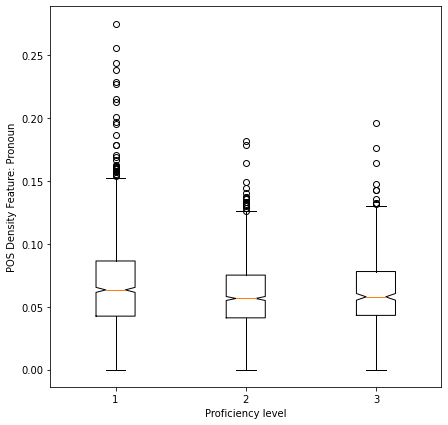

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


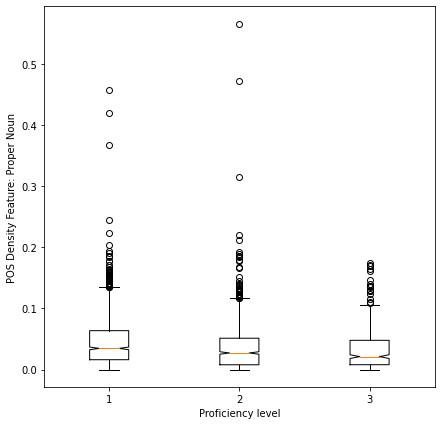

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


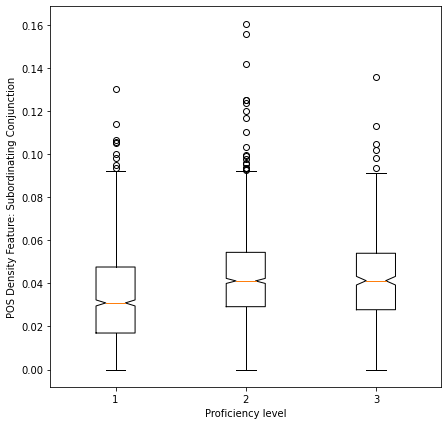

In [33]:
for feature in POS_features:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Lexical Variation Feature: Adjective


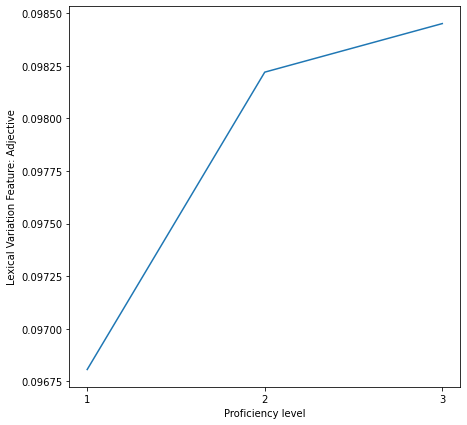

 
Lexical Variation Feature: Adverb


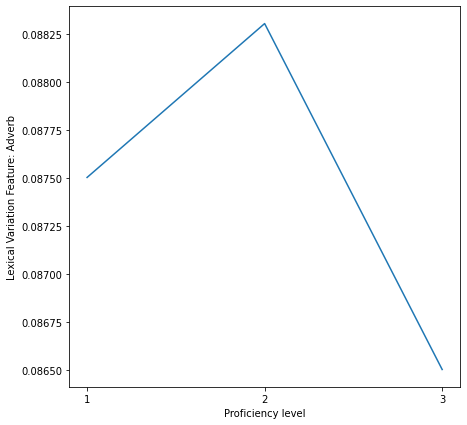

 
Lexical Variation Feature: Corrected Verb Variation 1


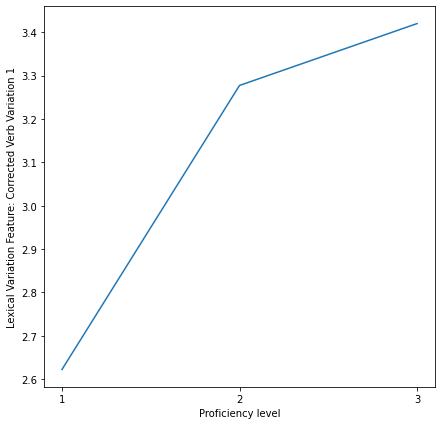

 
Lexical Variation Feature: Lexical


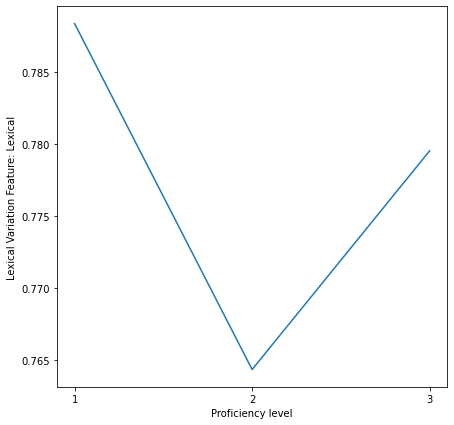

 
Lexical Variation Feature: Noun


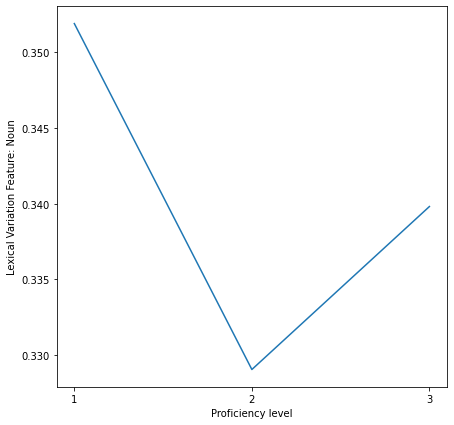

 
Lexical Variation Feature: Verb


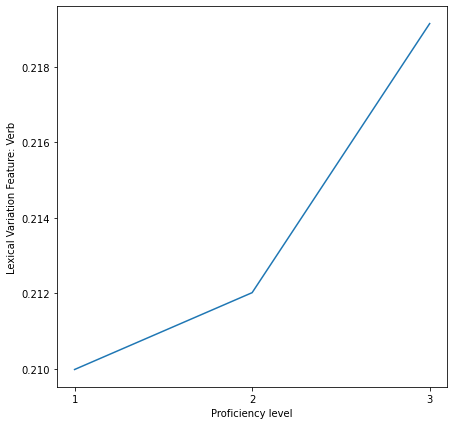

 
Number of POS Feature: Adjective Tokens


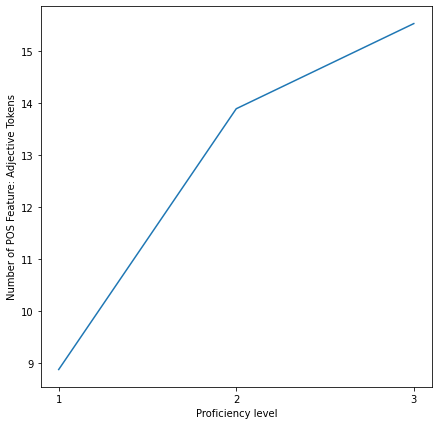

 
Number of POS Feature: Adverb Tokens


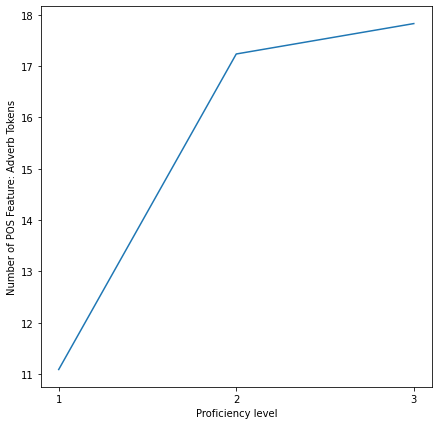

 
Number of POS Feature: Lexical word Tokens


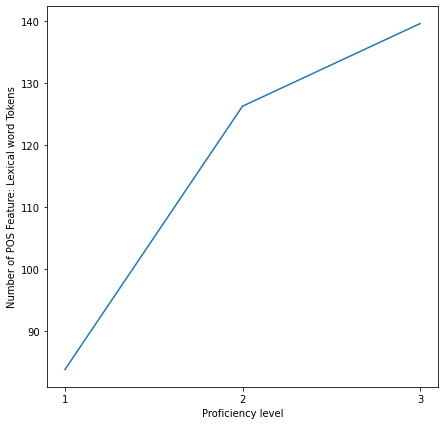

 
Number of POS Feature: Noun Tokens


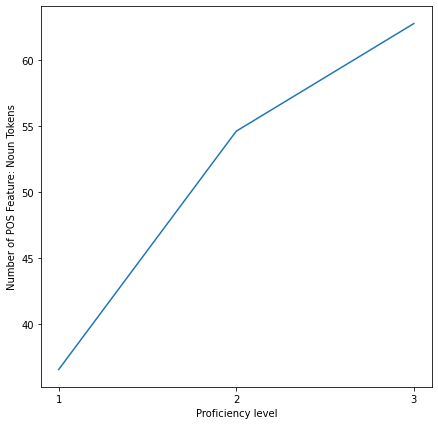

 
Number of POS Feature: Punctuation Tokens


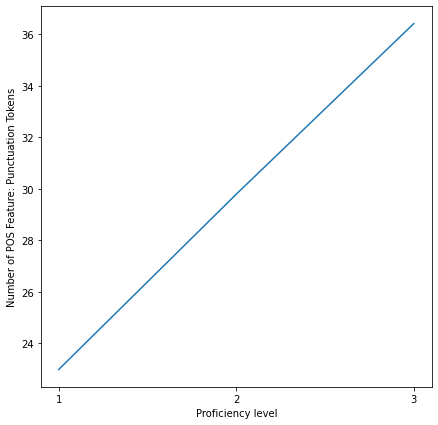

 
POS Density Feature: Article


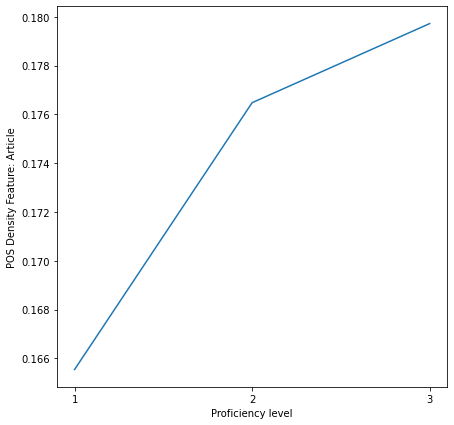

 
POS Density Feature: Auxiliary Verb


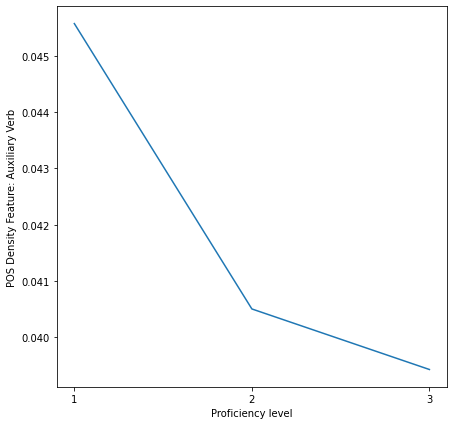

 
POS Density Feature: Conjunction


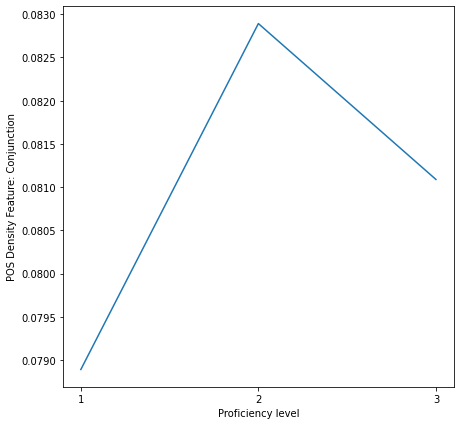

 
POS Density Feature: Coordinating Conjunction


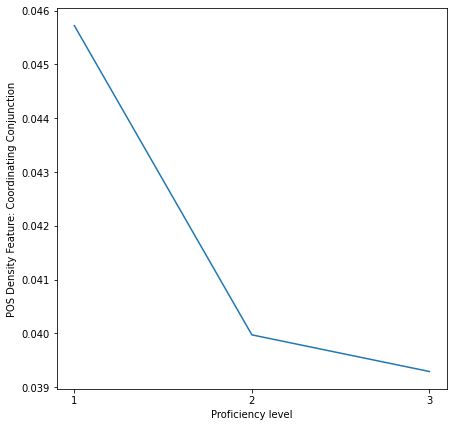

 
POS Density Feature: Determiner


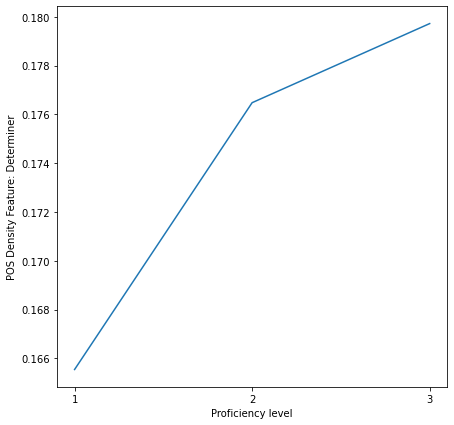

 
POS Density Feature: Functional Words


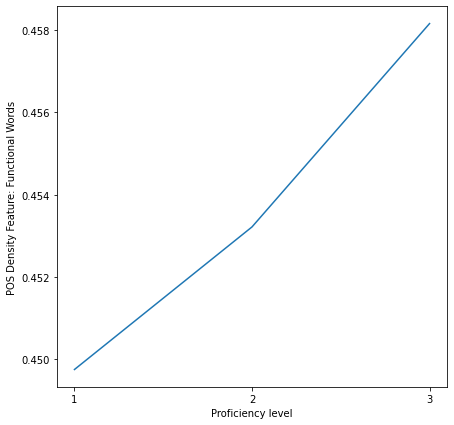

 
POS Density Feature: Interjection


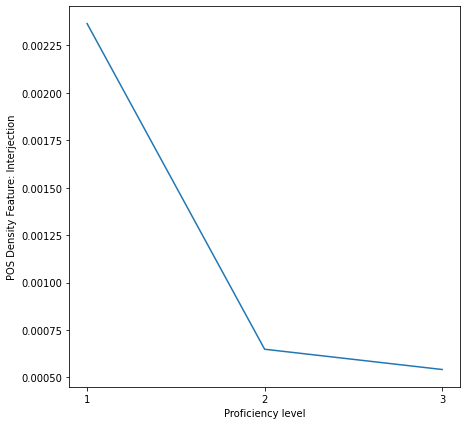

 
POS Density Feature: Lexical Words


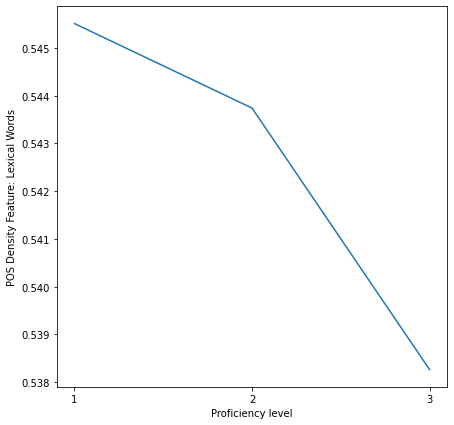

 
POS Density Feature: Modifier


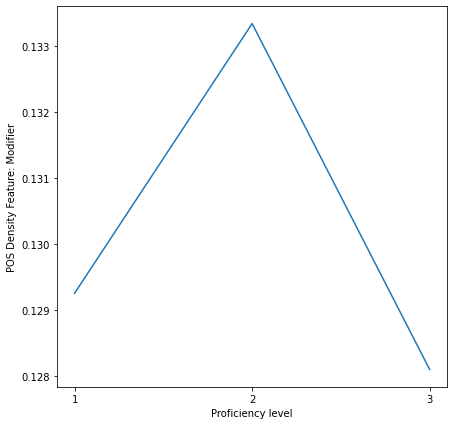

 
POS Density Feature: Noun


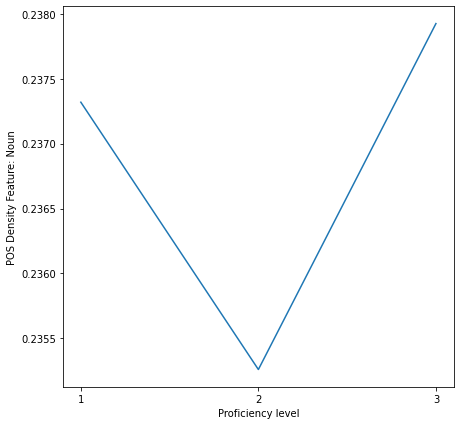

 
POS Density Feature: Preposition


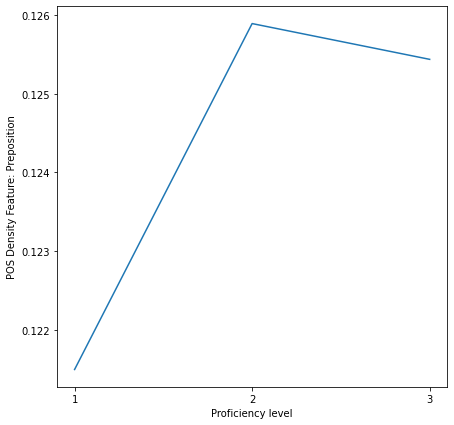

 
POS Density Feature: Pronoun


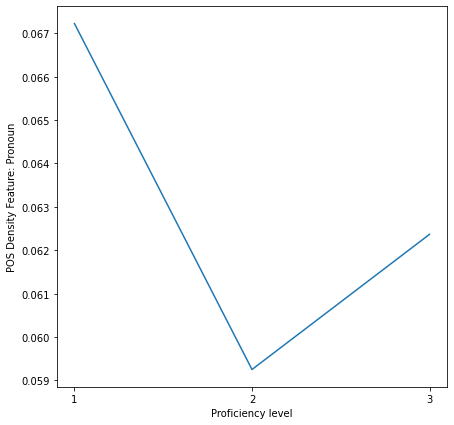

 
POS Density Feature: Proper Noun


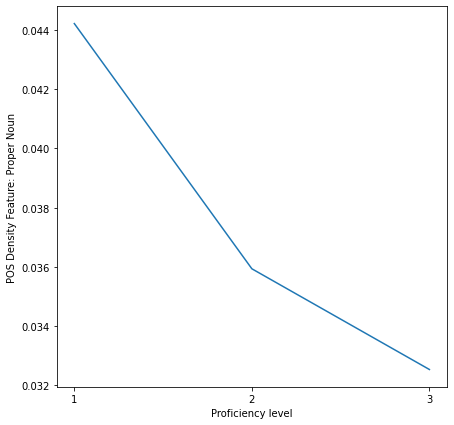

 
POS Density Feature: Subordinating Conjunction


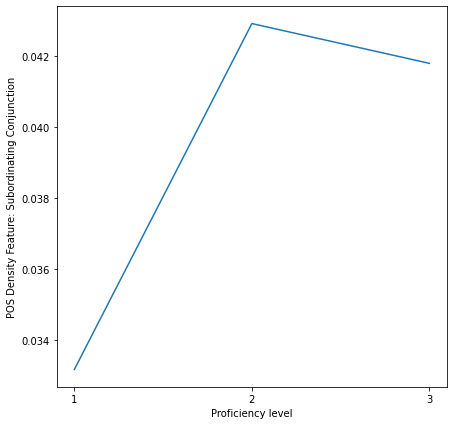

In [34]:
for feature in POS_features:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [35]:
lexical_sophistication = ['Lexical Sophistication Feature: Age of Acquisition (AW Token)',
'Lexical Sophistication Feature: Concreteness (AW Token)',
'Lexical Sophistication Feature: Familiarity (LW Token)',
'Lexical Sophistication Feature: Imageability (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 1',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 5',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 6',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 1000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 2000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 3000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 5000',
'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)'
]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


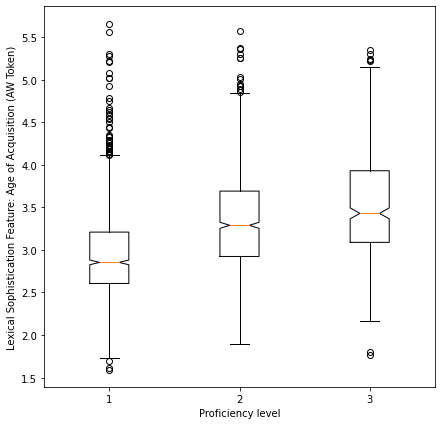

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


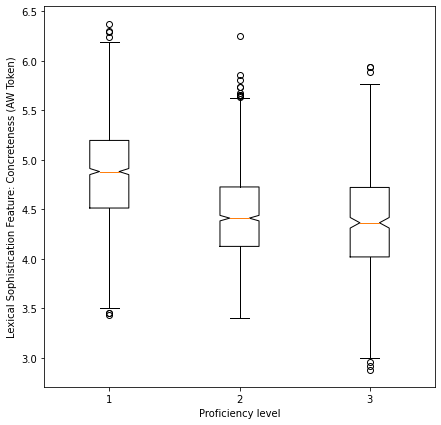

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


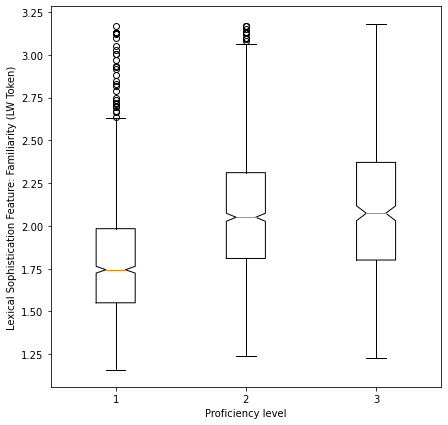

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


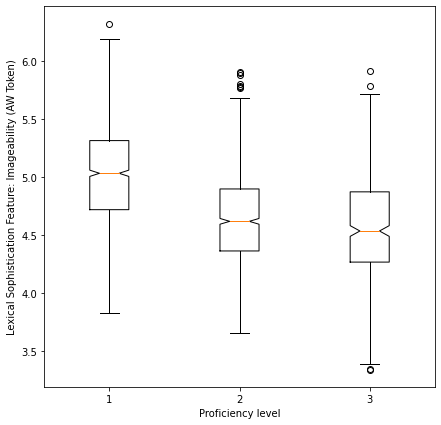

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


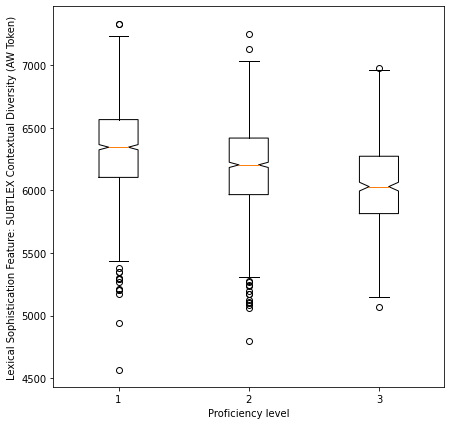

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


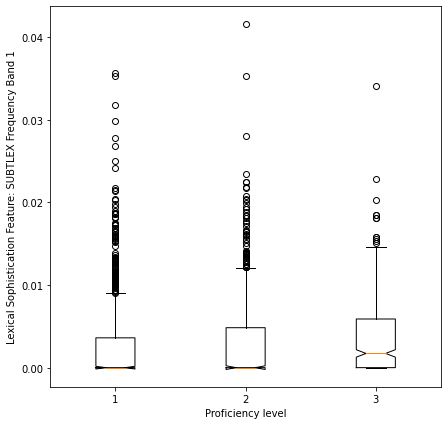

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


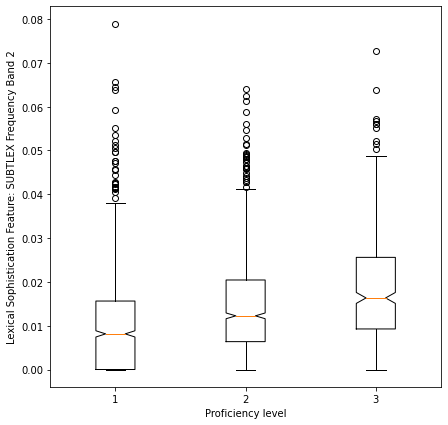

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


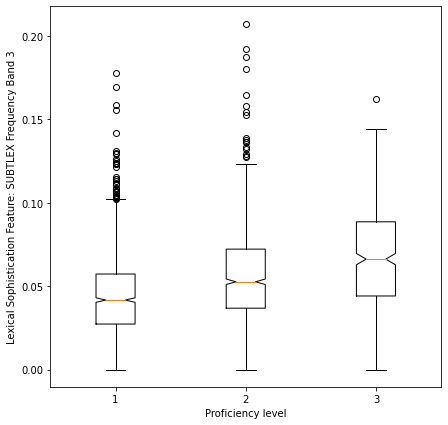

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


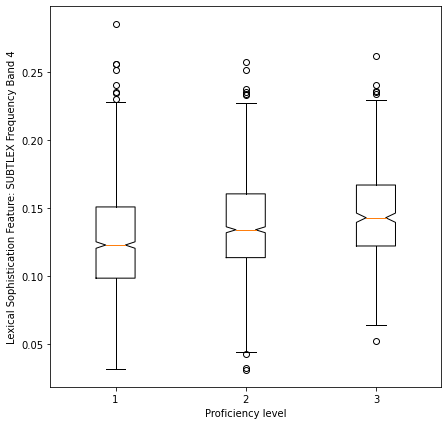

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


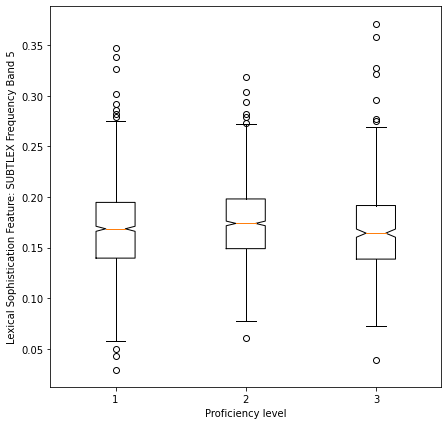

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


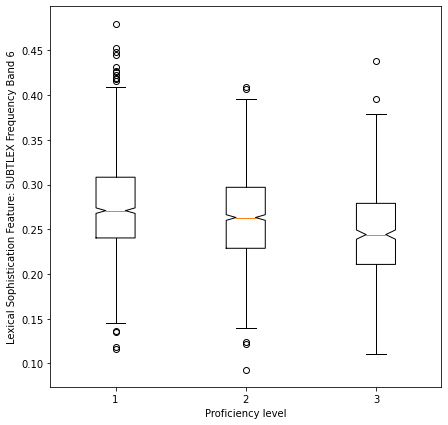

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


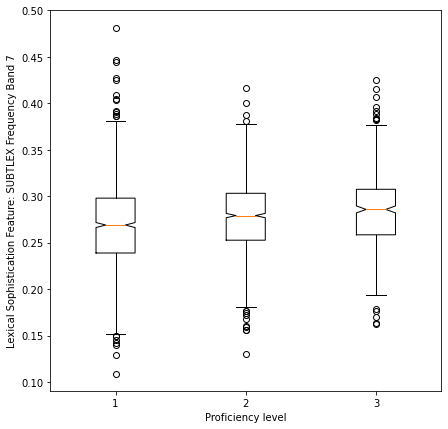

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


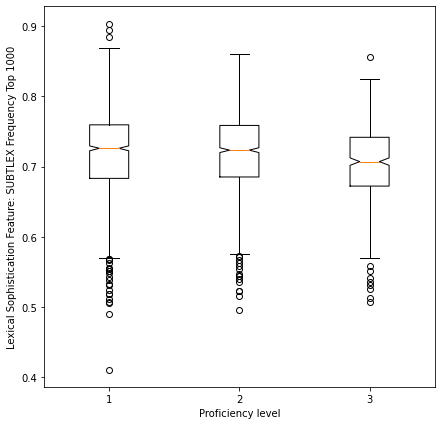

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


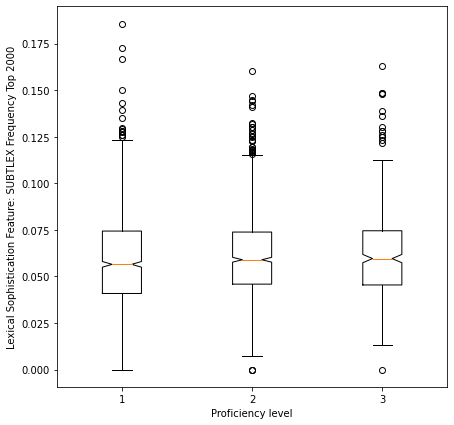

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


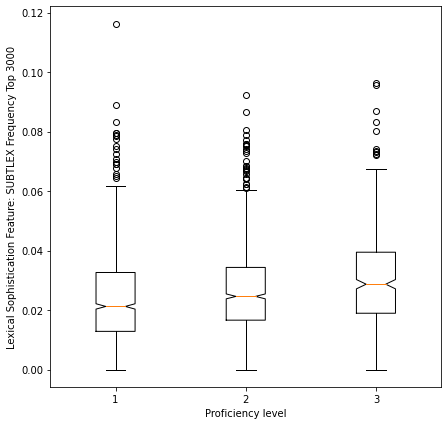

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


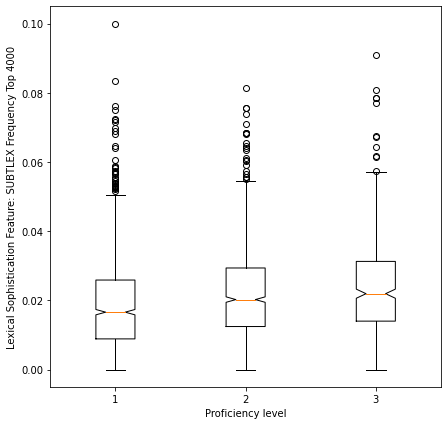

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


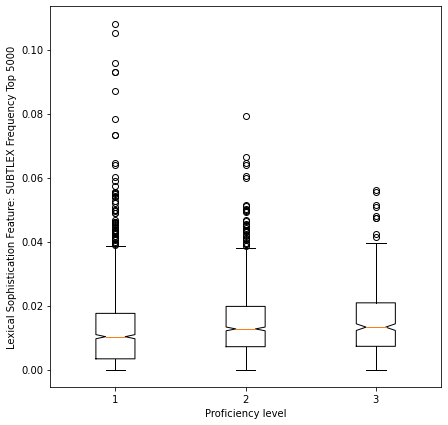

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


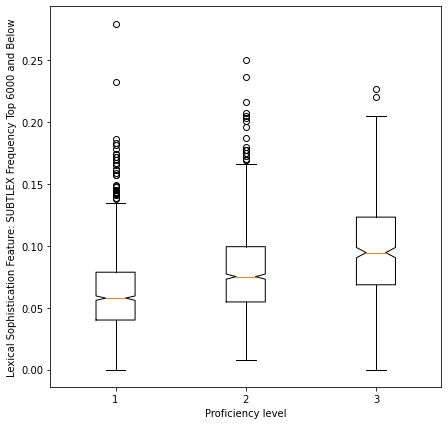

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


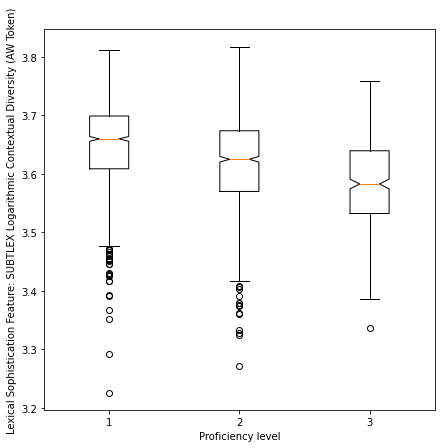

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


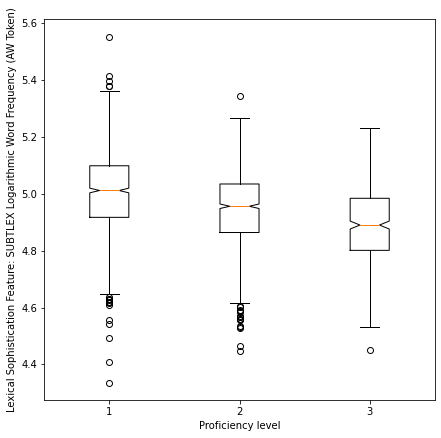

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


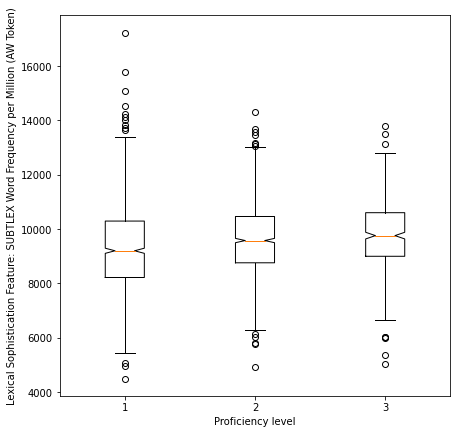

In [36]:
for feature in lexical_sophistication:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Lexical Sophistication Feature: Age of Acquisition (AW Token)


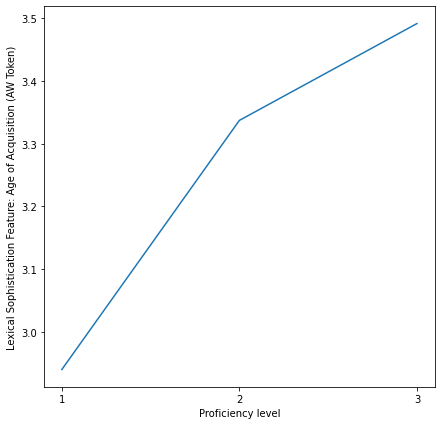

 
Lexical Sophistication Feature: Concreteness (AW Token)


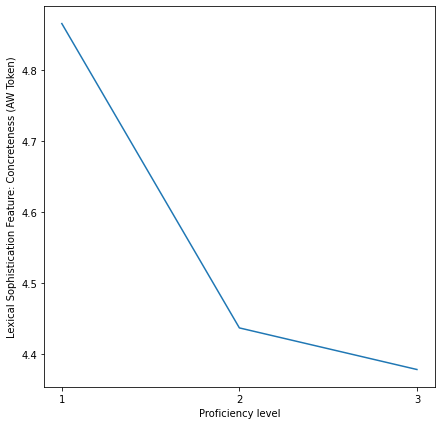

 
Lexical Sophistication Feature: Familiarity (LW Token)


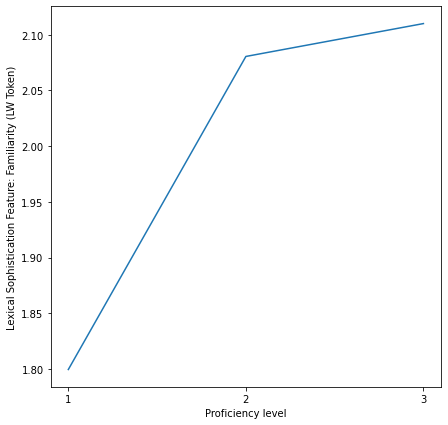

 
Lexical Sophistication Feature: Imageability (AW Token)


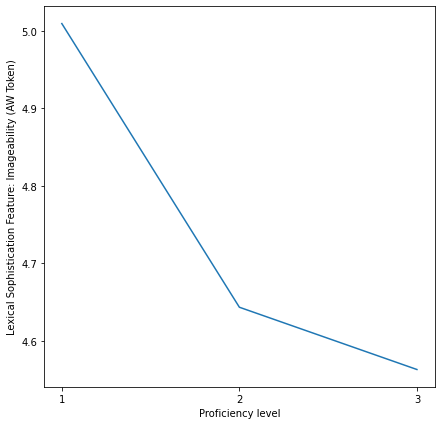

 
Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Token)


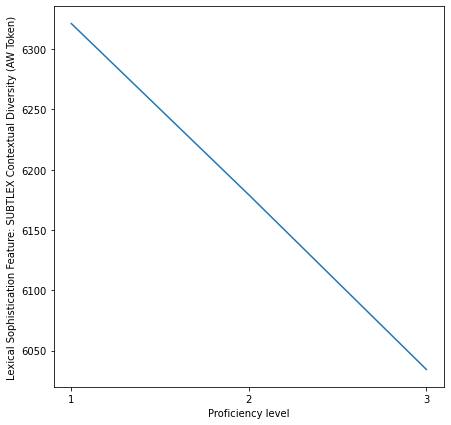

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 1


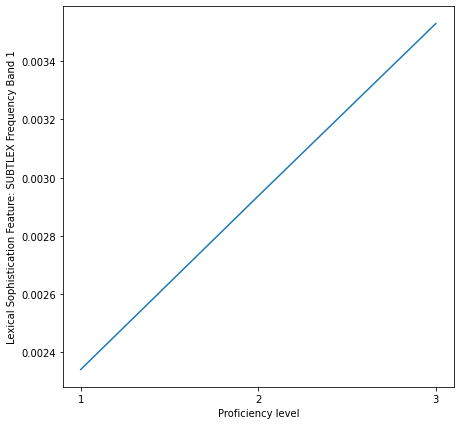

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 2


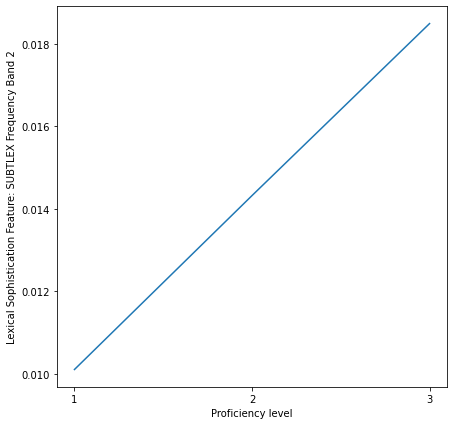

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 3


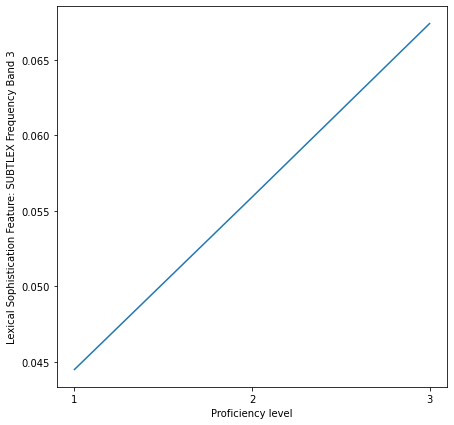

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 4


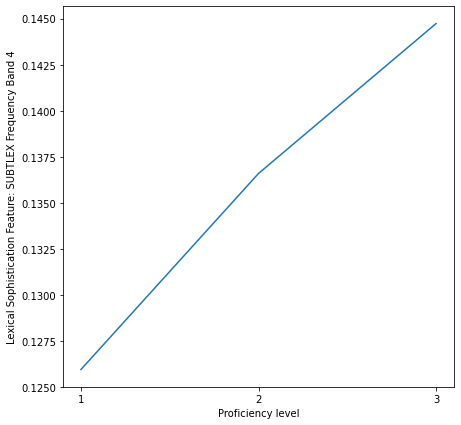

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 5


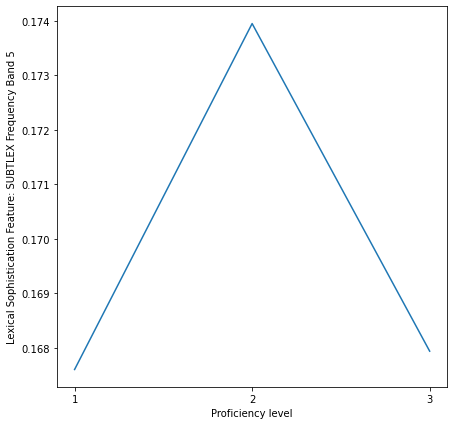

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 6


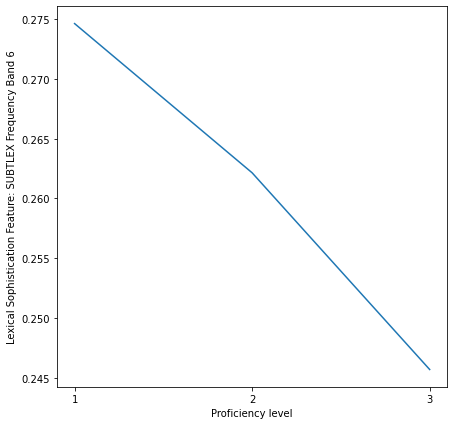

 
Lexical Sophistication Feature: SUBTLEX Frequency Band 7


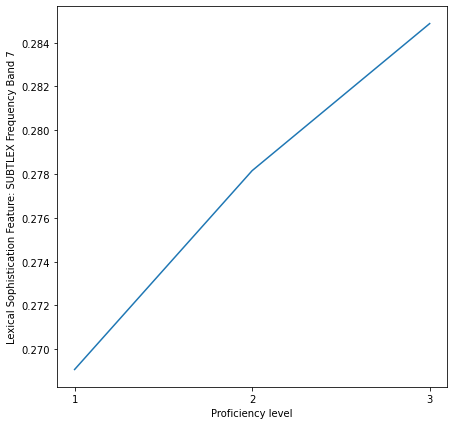

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 1000


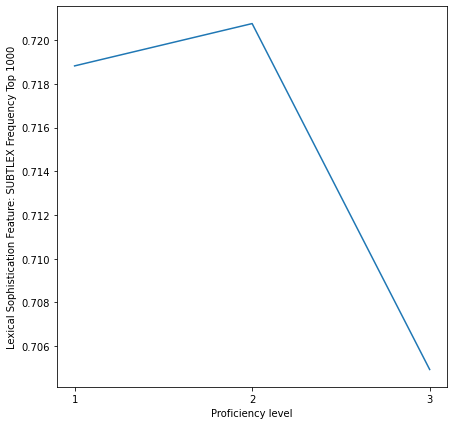

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 2000


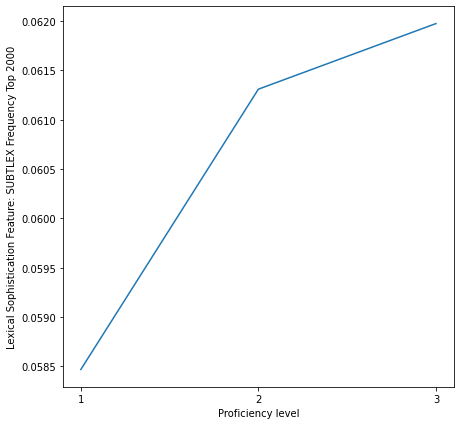

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 3000


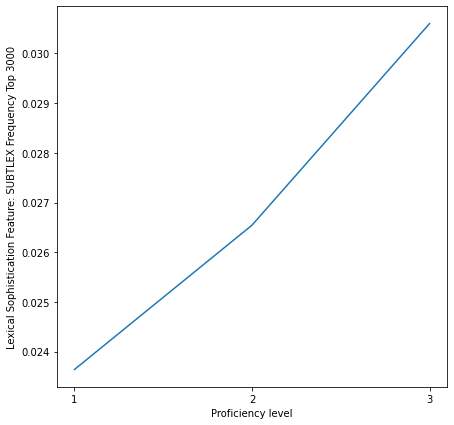

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 4000


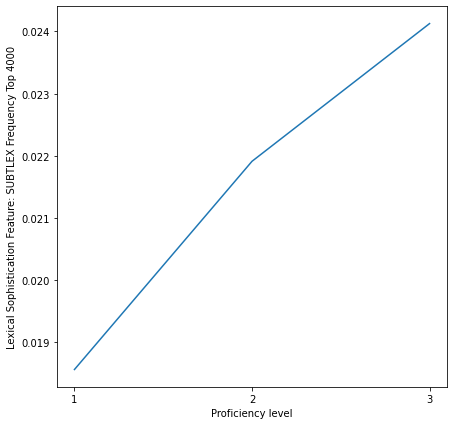

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 5000


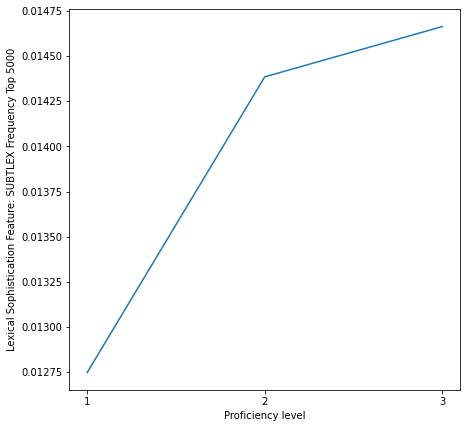

 
Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below


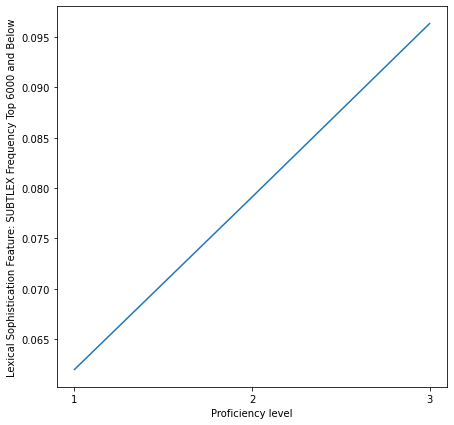

 
Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Token)


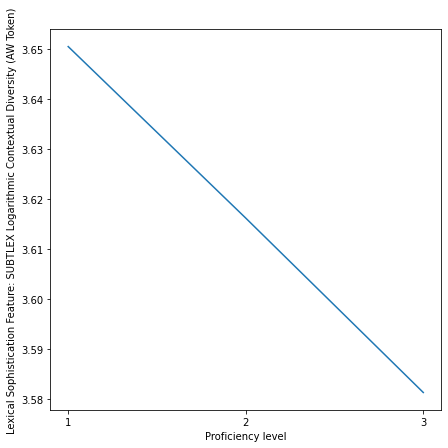

 
Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)


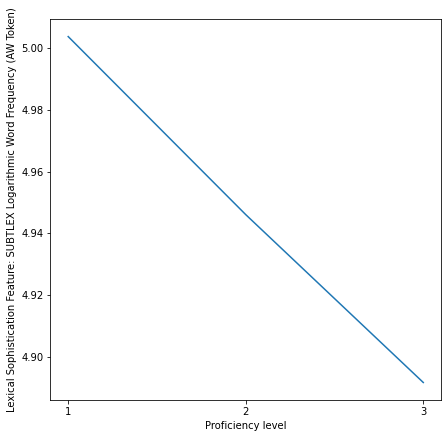

 
Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)


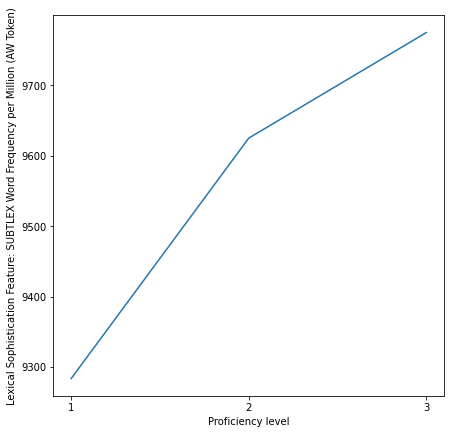

In [37]:
for feature in lexical_sophistication:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [38]:
morphological = ['Number of Morphological Features: Conditional Verb per VP',
'Number of Morphological Features: Imperfect Verb per VP',
'Number of Morphological Features: Pluperfect Verb per VP',
'Number of Morphological Features: Preterite Verb per VP',
'Number of Morphological Features: Subjunctive Verb per VP',
'Number of Morphological Features: Simple Future Verb per VP',
'Number of Morphological Features: Relative Pronouns',
'Number of Morphological Features: Indefinite Pronouns',
'Morphological Complexity Inflection Feature: Feminine inflection per word token',
'Morphological Complexity Inflection Feature: First Person per word token',
'Morphological Complexity Inflection Feature: Imperfect tense per verb token',
'Morphological Complexity Inflection Feature: Indicatives per Verb',
'Morphological Complexity Inflection Feature: Infinite Verb Density',
'Morphological Complexity Inflection Feature: Masculine inflection per word token',
'Morphological Complexity Inflection Feature: Past Participle Verb Density',
'Morphological Complexity Inflection Feature: Past tense per verb token',
'Morphological Complexity Inflection Feature: Second Person per word token',
'Morphological Complexity Inflection Feature: Singular per word token',
'Morphological Complexity Inflection Feature: Subjunctives per verb token',
'Morphological Complexity Inflection Feature: Third Person per word token',
]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


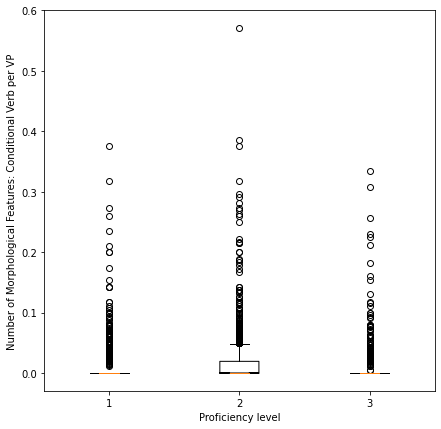

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


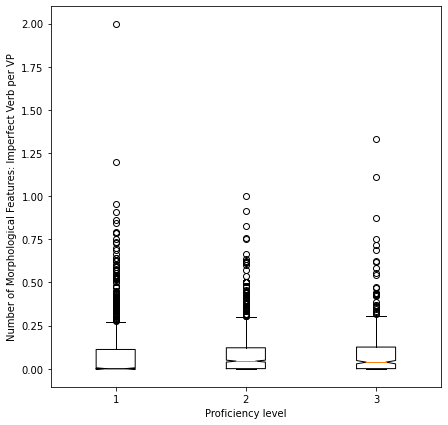

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


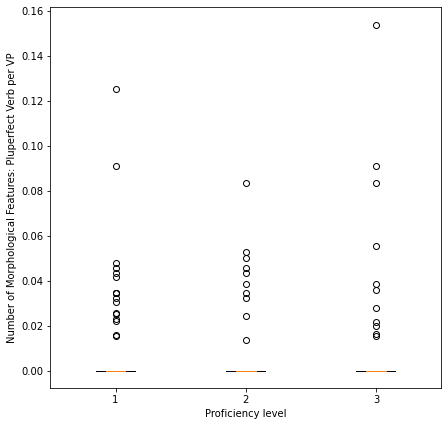

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


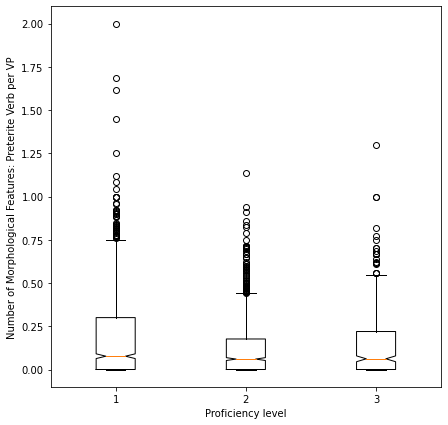

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


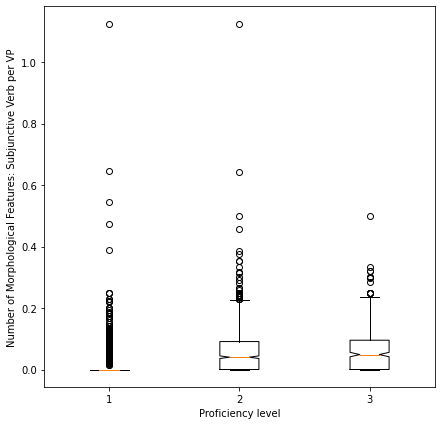

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


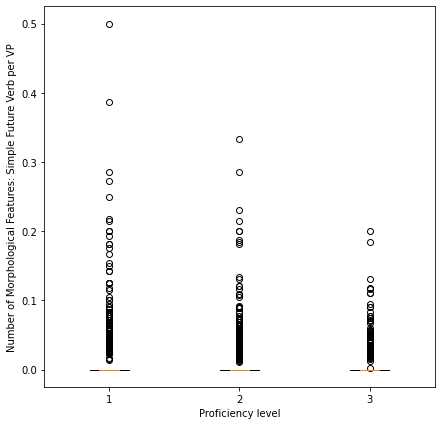

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


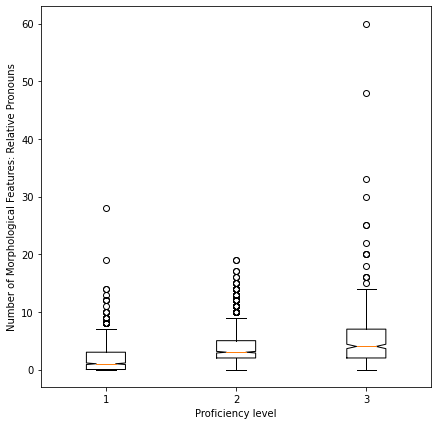

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


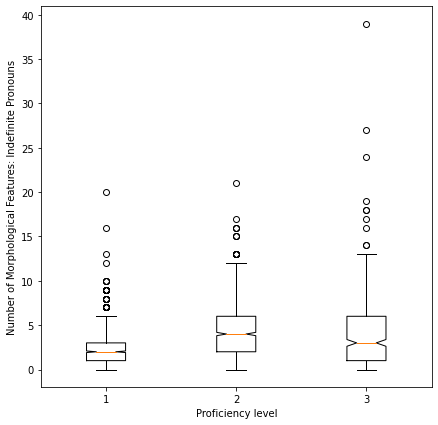

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


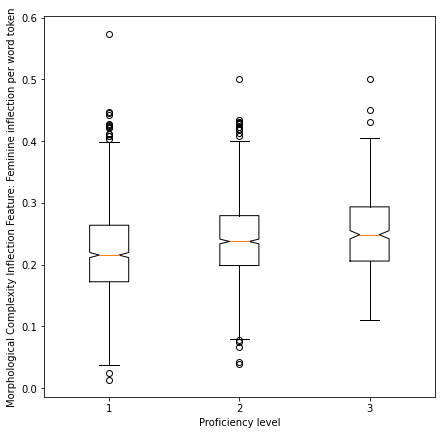

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


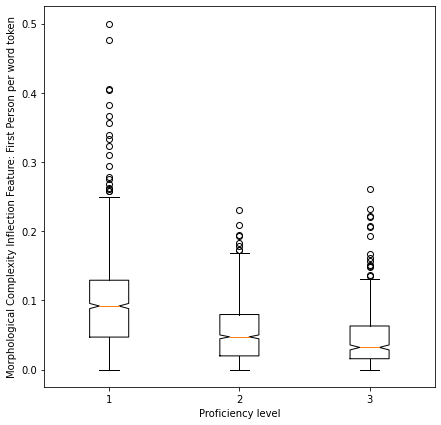

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


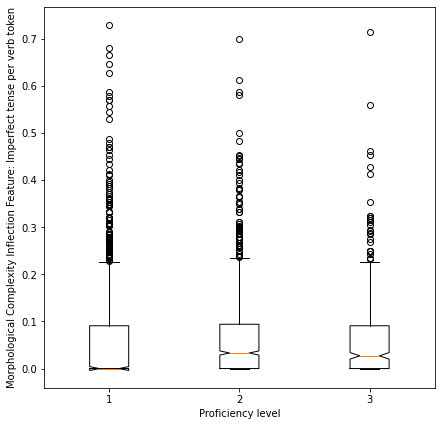

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


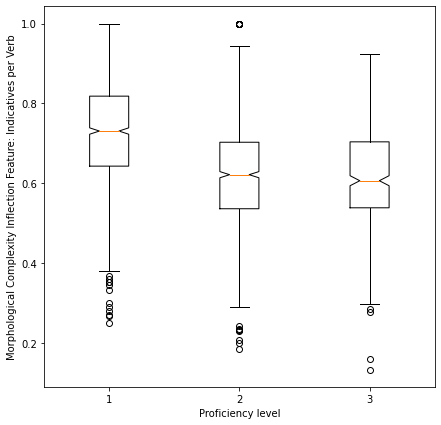

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


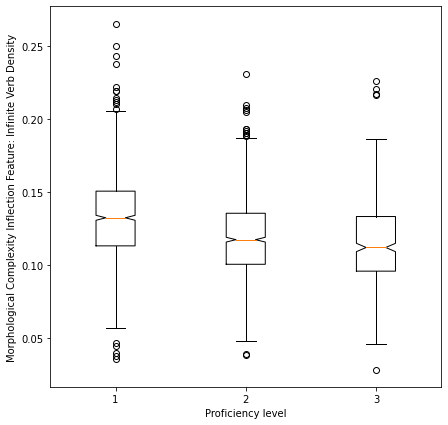

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


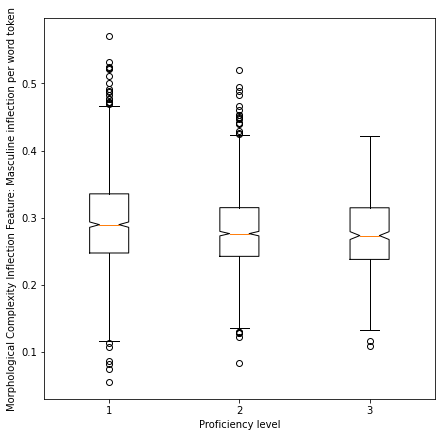

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


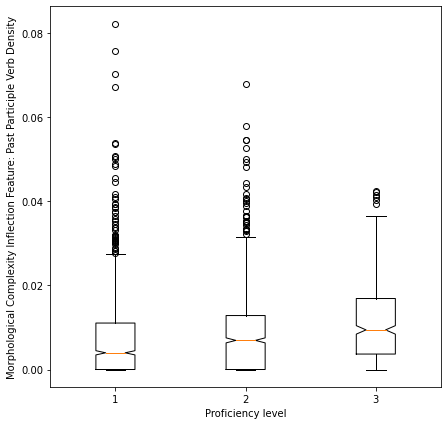

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


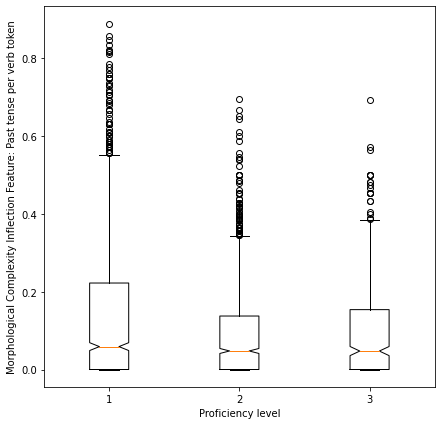

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


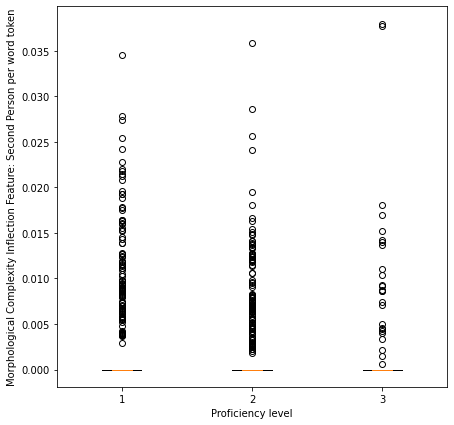

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


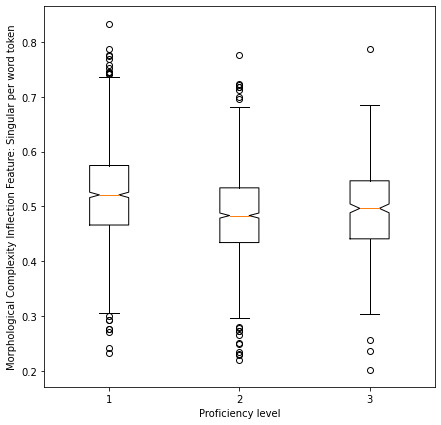

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


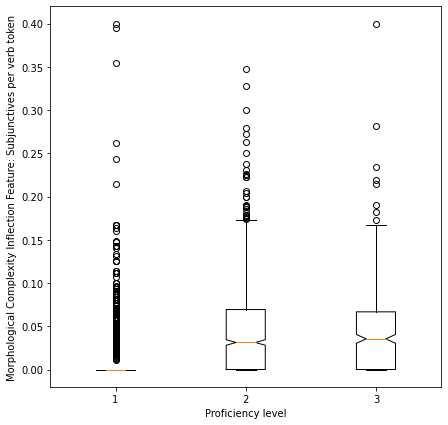

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


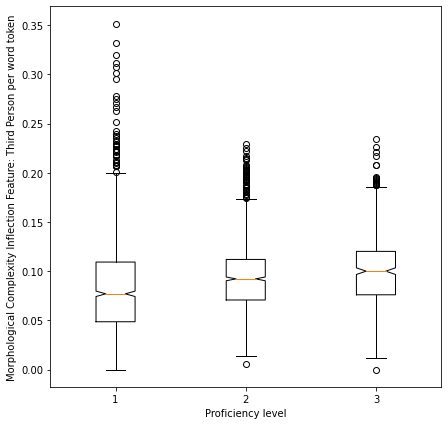

In [39]:
for feature in morphological:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Number of Morphological Features: Conditional Verb per VP


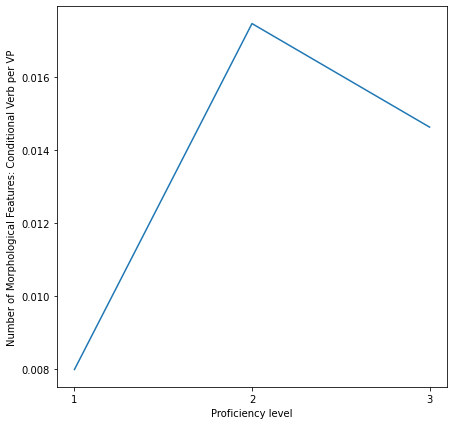

 
Number of Morphological Features: Imperfect Verb per VP


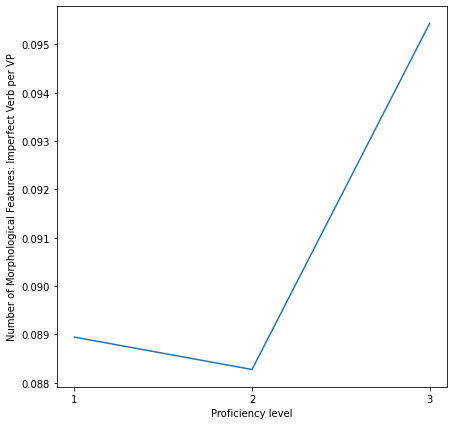

 
Number of Morphological Features: Pluperfect Verb per VP


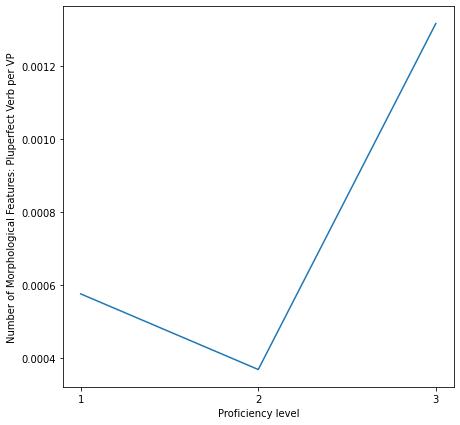

 
Number of Morphological Features: Preterite Verb per VP


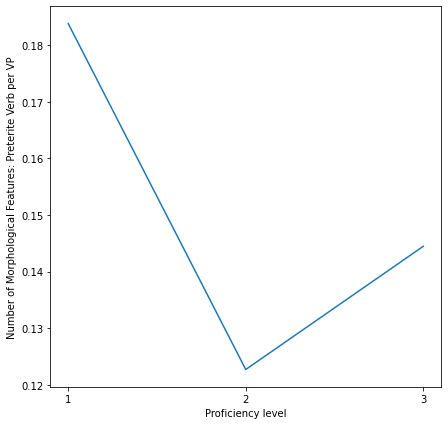

 
Number of Morphological Features: Subjunctive Verb per VP


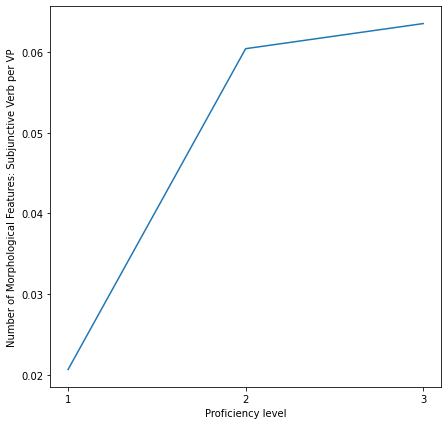

 
Number of Morphological Features: Simple Future Verb per VP


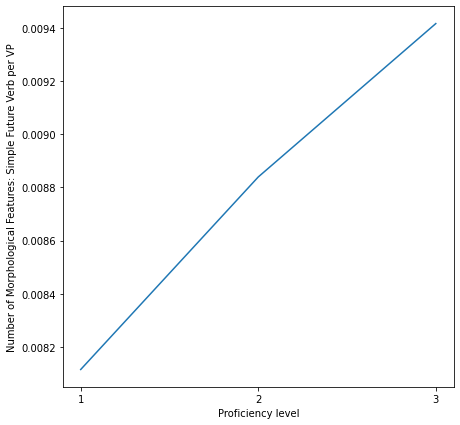

 
Number of Morphological Features: Relative Pronouns


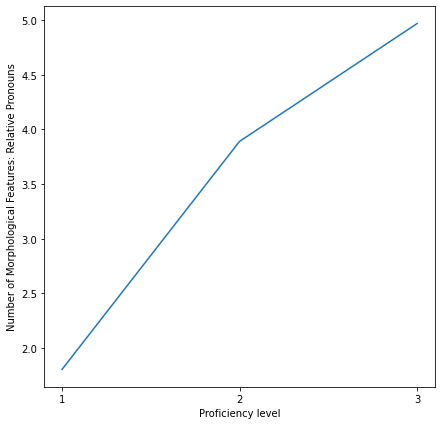

 
Number of Morphological Features: Indefinite Pronouns


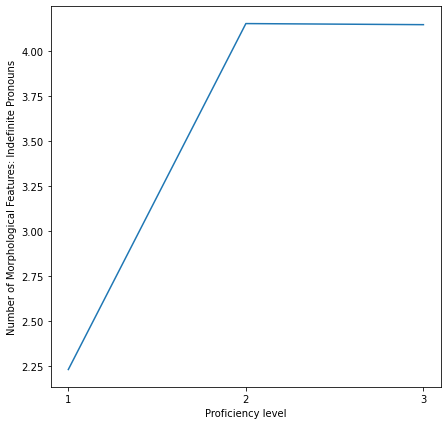

 
Morphological Complexity Inflection Feature: Feminine inflection per word token


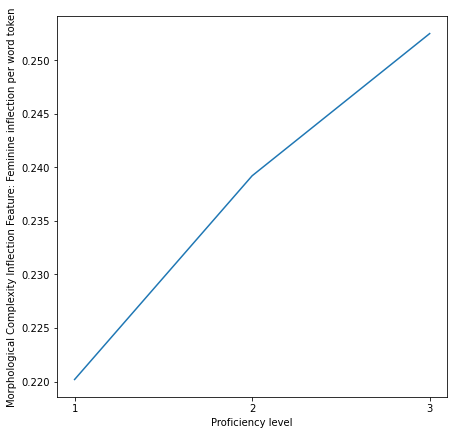

 
Morphological Complexity Inflection Feature: First Person per word token


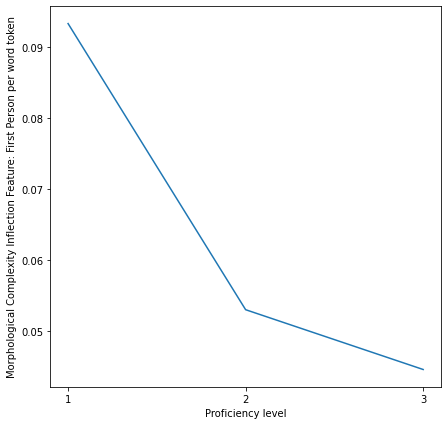

 
Morphological Complexity Inflection Feature: Imperfect tense per verb token


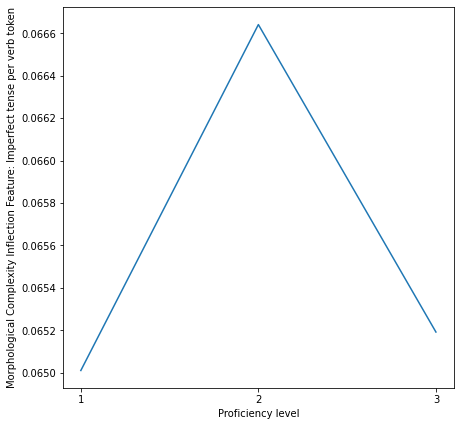

 
Morphological Complexity Inflection Feature: Indicatives per Verb


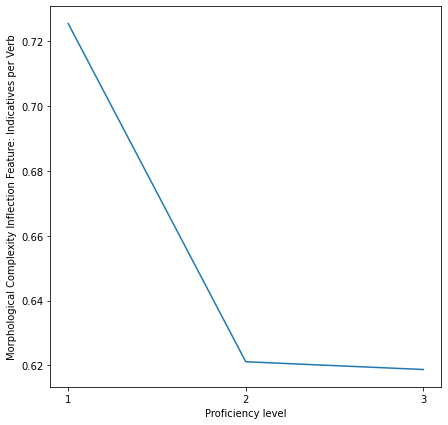

 
Morphological Complexity Inflection Feature: Infinite Verb Density


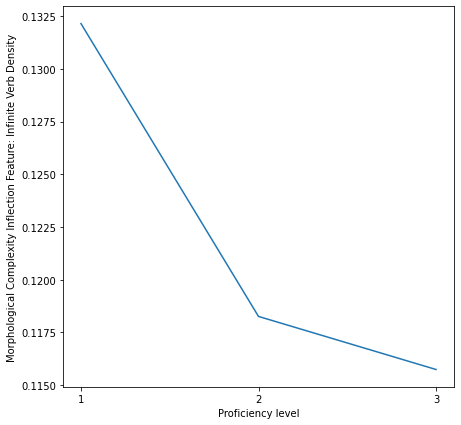

 
Morphological Complexity Inflection Feature: Masculine inflection per word token


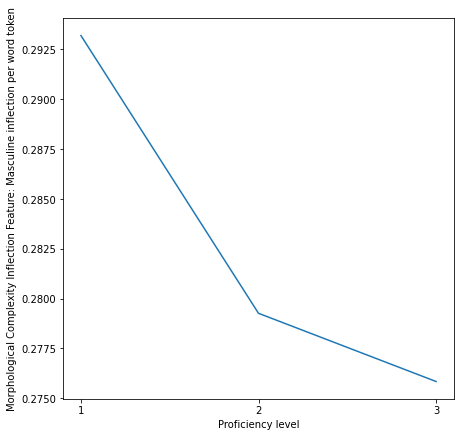

 
Morphological Complexity Inflection Feature: Past Participle Verb Density


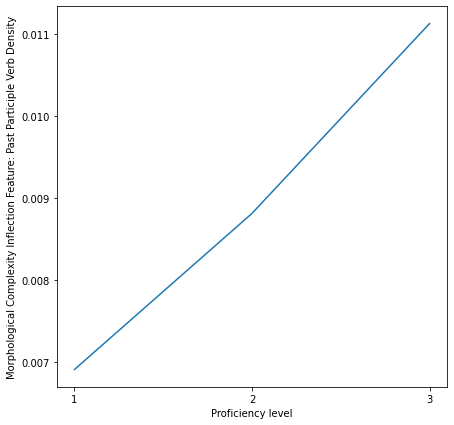

 
Morphological Complexity Inflection Feature: Past tense per verb token


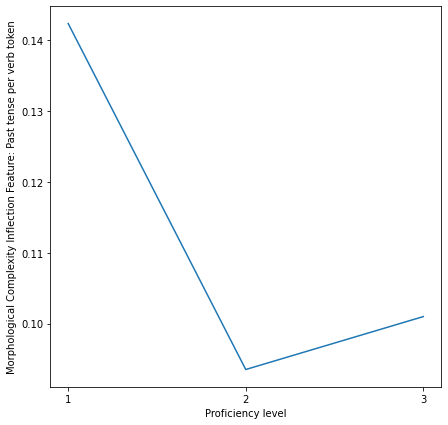

 
Morphological Complexity Inflection Feature: Second Person per word token


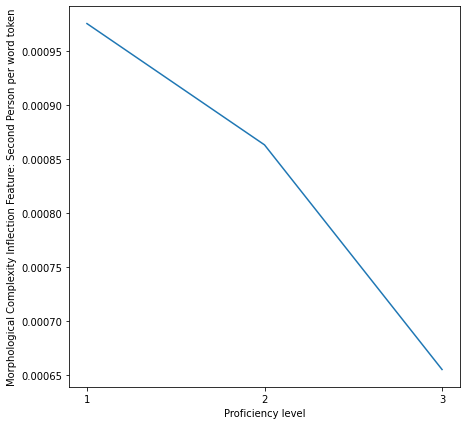

 
Morphological Complexity Inflection Feature: Singular per word token


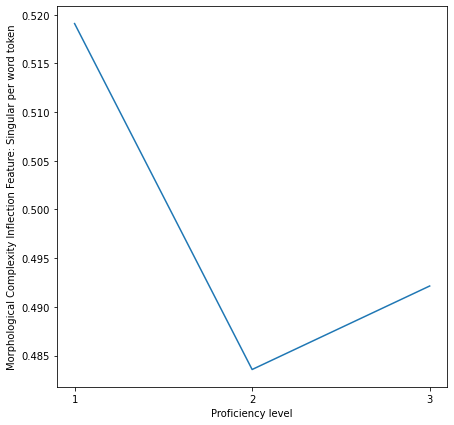

 
Morphological Complexity Inflection Feature: Subjunctives per verb token


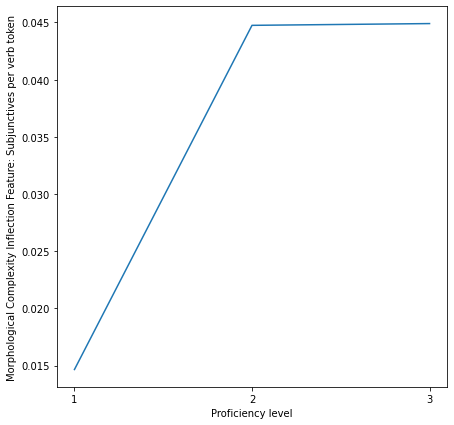

 
Morphological Complexity Inflection Feature: Third Person per word token


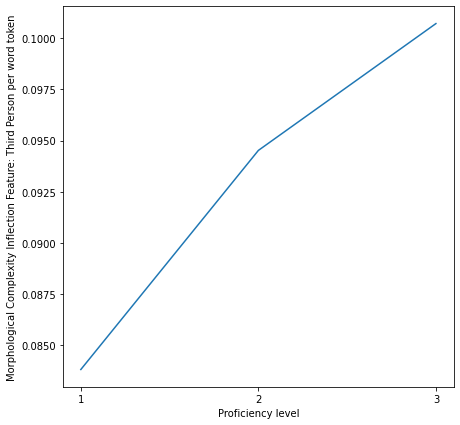

In [40]:
for feature in morphological:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [18]:
syntactic = ['Number of Syntactic Constituents: Passive Sentences',
'Number of Syntactic Constituents: Coordinate Phrases',
'Number of Syntactic Constituents: Dependent Clauses',
'Number of Syntactic Constituents: Relative Clauses',
'Number of Syntactic Constituents: Subordinate Clauses',
'Number of Syntactic Constituents: Open Clausal Complement',
'Number of Syntactic Constituents: Clausal Subject',
'Syntactic Complexity Feature: Complex Nominals per Sentence',
'Syntactic Complexity Feature: Complex T-unit per Sentence',
'Syntactic Complexity Feature: Coordinate Phrases per Sentence',
'Syntactic Complexity Feature: Dependent clauses per Sentence',
'Syntactic Complexity Feature: Mean Length of Clause',
'Syntactic Complexity Feature: Mean Length of Complex T-unit',
'Syntactic Complexity Feature: Mean Length of Noun Phrase',
'Syntactic Complexity Feature: Mean Length of Prepositional Phrase',
'Syntactic Complexity Feature: Mean Length of T-unit',
'Syntactic Complexity Feature: Noun Phrases per Sentence',
'Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase',
'Syntactic Complexity Feature: Prepositional Phrases per Sentence',
'Syntactic Complexity Feature: Relative Clauses per Sentence',
'Syntactic Complexity Feature: Sentence Complexity Ratio',
'Syntactic Complexity Feature: Verb Cluster per Sentence',
'Syntactic Complexity Feature: Verb Phrases per Sentence',
'Syntactic Complexity Feature: e-que Cleft per VP']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


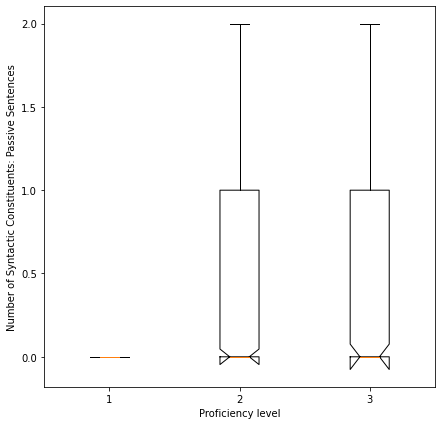

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


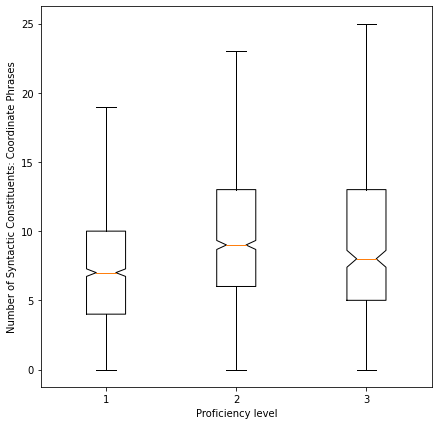

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


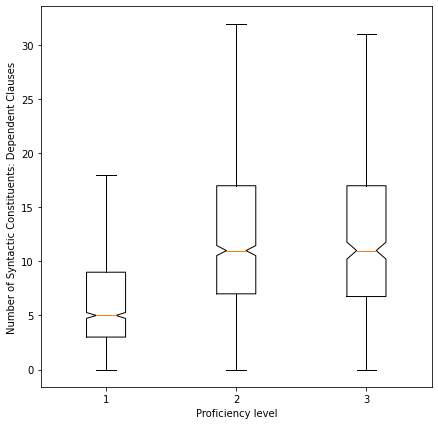

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


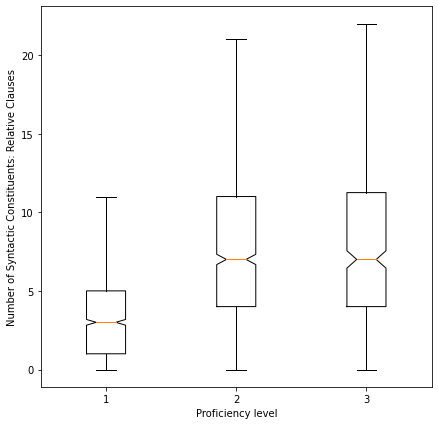

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


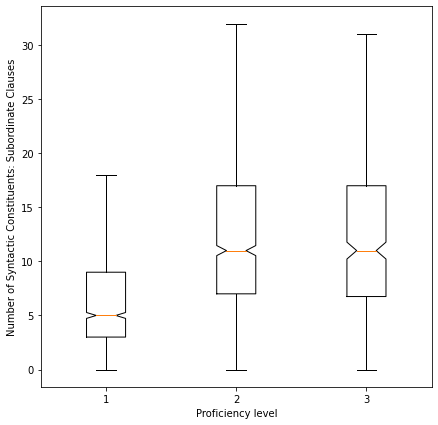

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


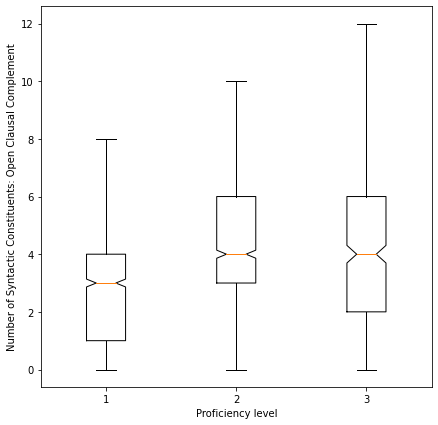

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


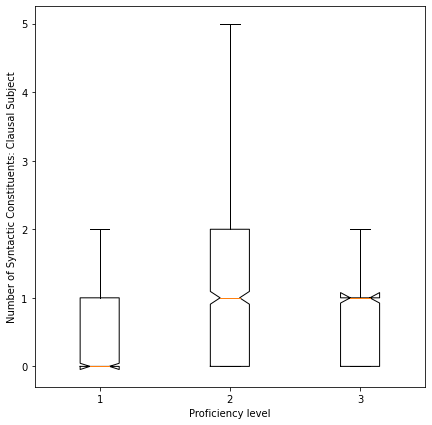

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


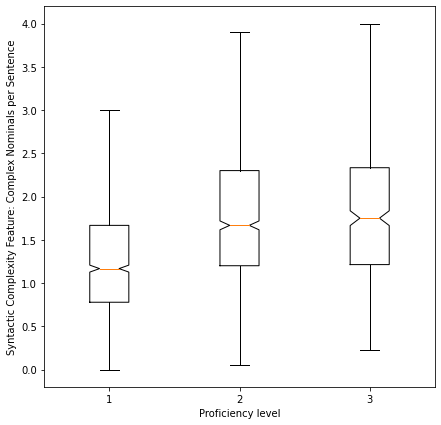

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


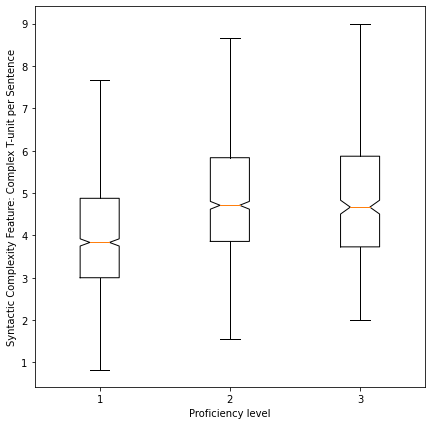

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


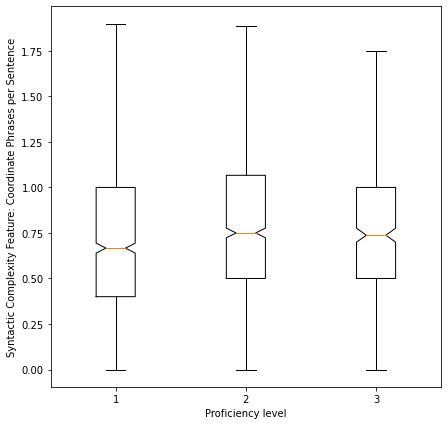

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


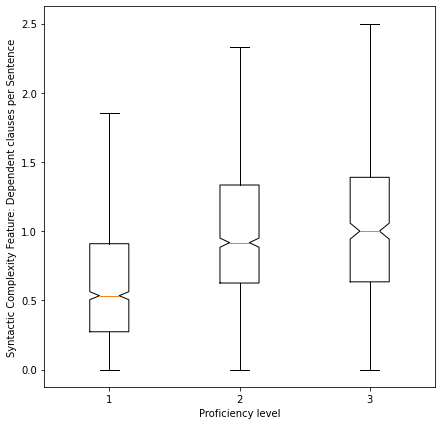

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


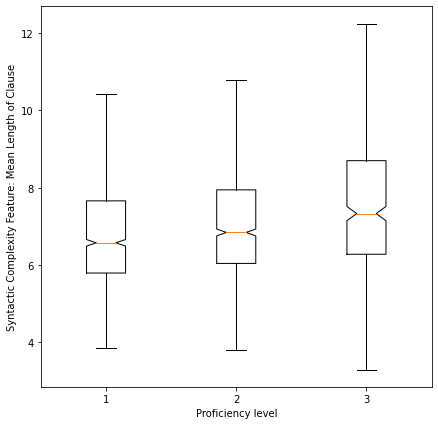

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


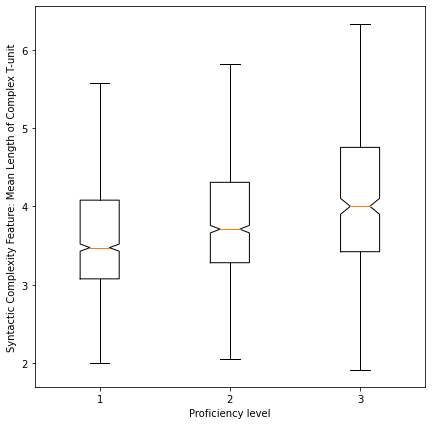

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


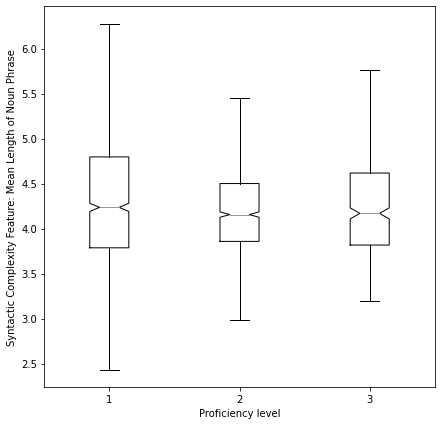

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


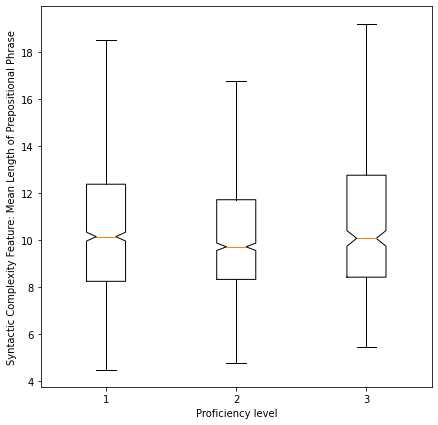

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


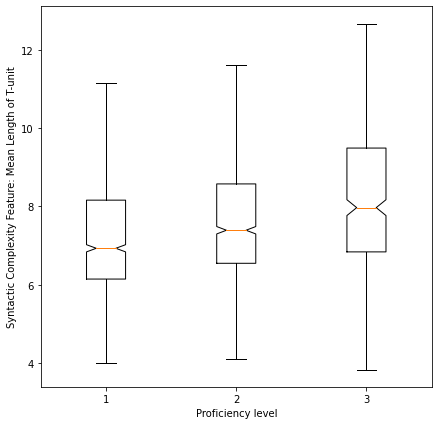

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


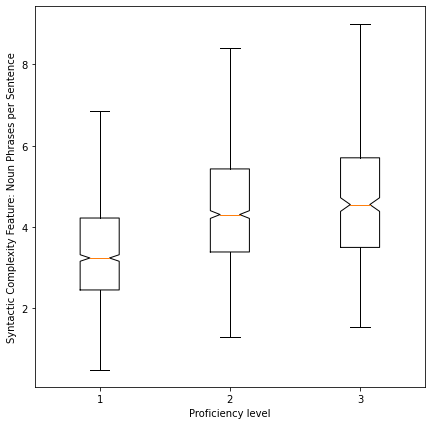

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


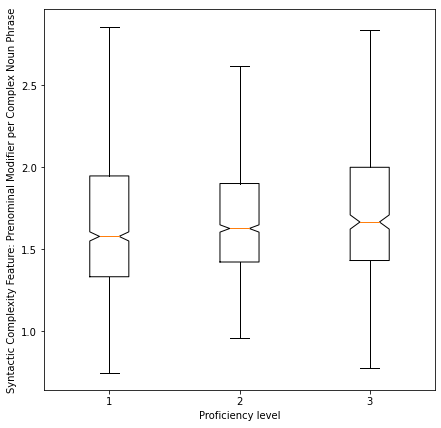

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


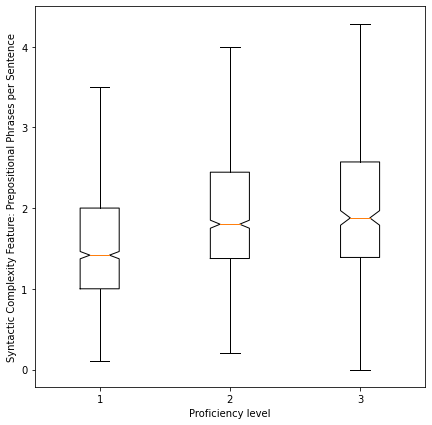

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


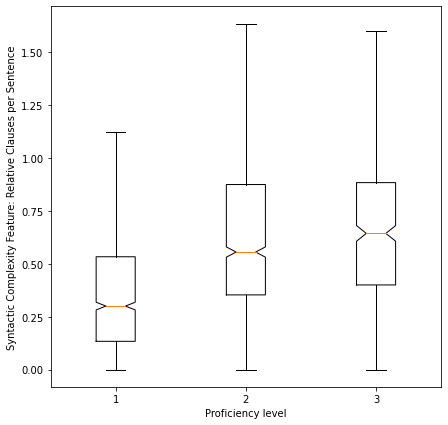

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


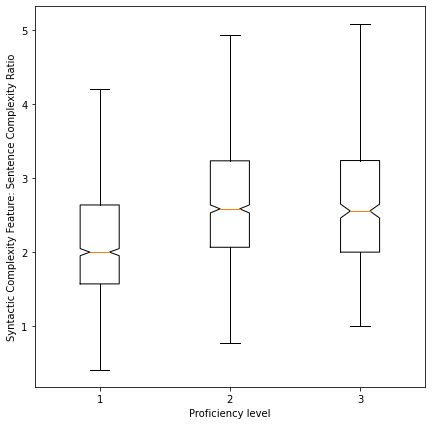

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


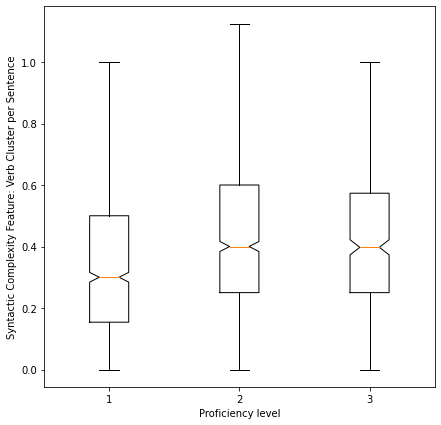

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


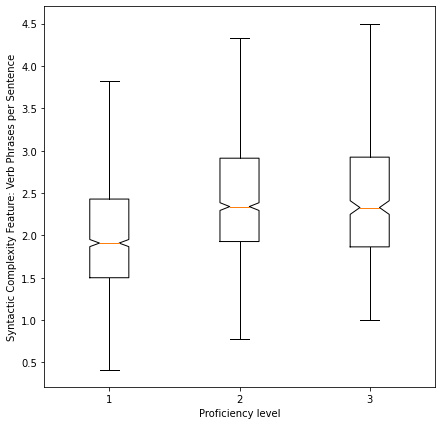

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


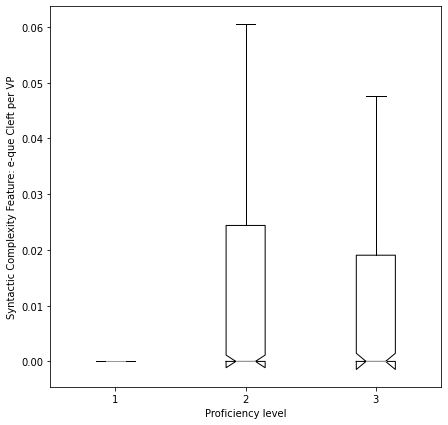

In [19]:
for feature in syntactic:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  #plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=False)
  plt.show()

Number of Syntactic Constituents: Passive Sentences


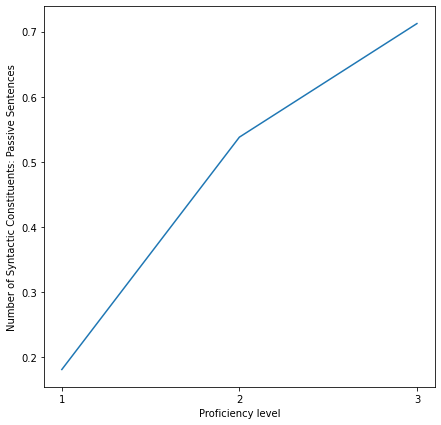

 
Number of Syntactic Constituents: Coordinate Phrases


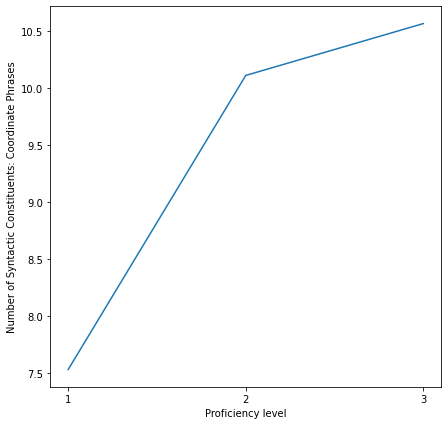

 
Number of Syntactic Constituents: Dependent Clauses


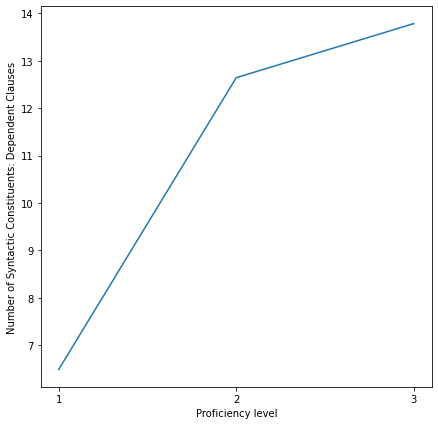

 
Number of Syntactic Constituents: Relative Clauses


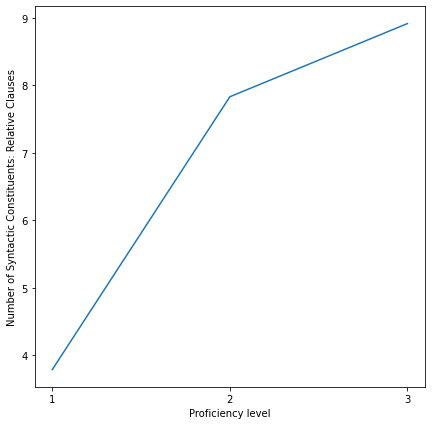

 
Number of Syntactic Constituents: Subordinate Clauses


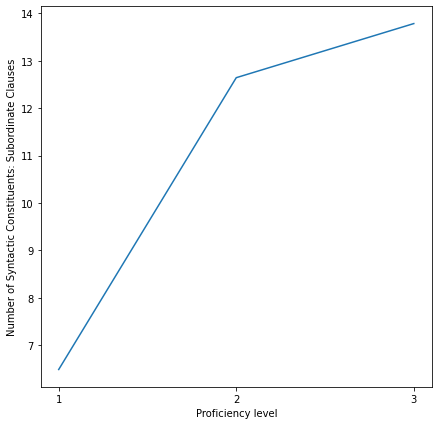

 
Number of Syntactic Constituents: Open Clausal Complement


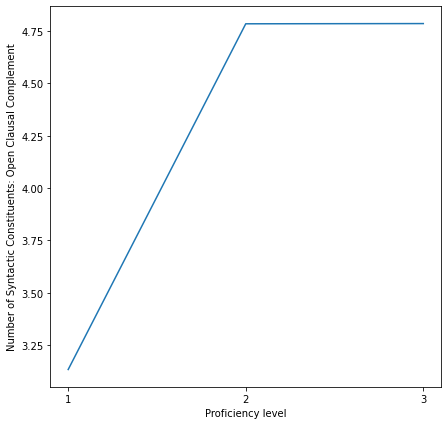

 
Number of Syntactic Constituents: Clausal Subject


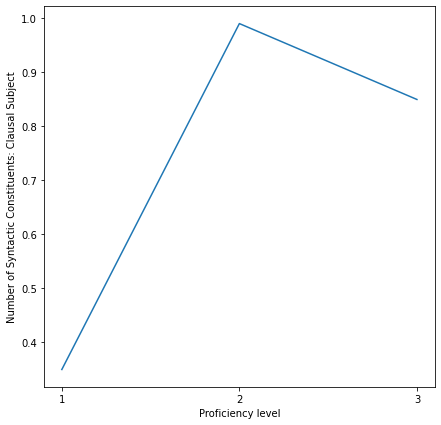

 
Syntactic Complexity Feature: Complex Nominals per Sentence


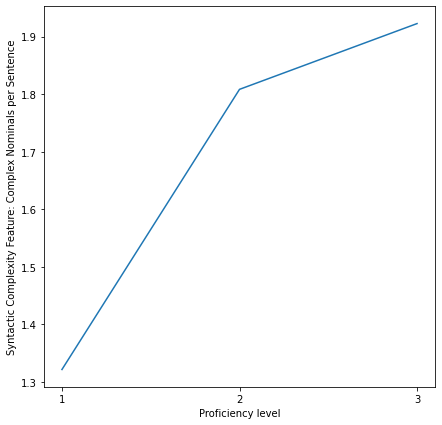

 
Syntactic Complexity Feature: Complex T-unit per Sentence


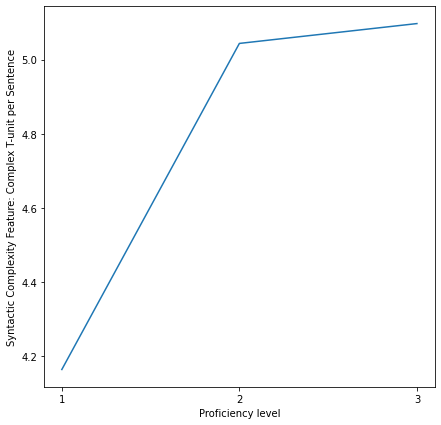

 
Syntactic Complexity Feature: Coordinate Phrases per Sentence


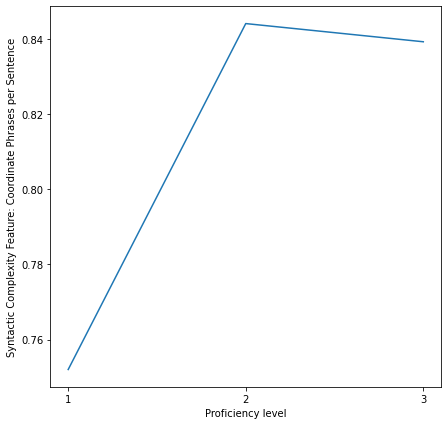

 
Syntactic Complexity Feature: Dependent clauses per Sentence


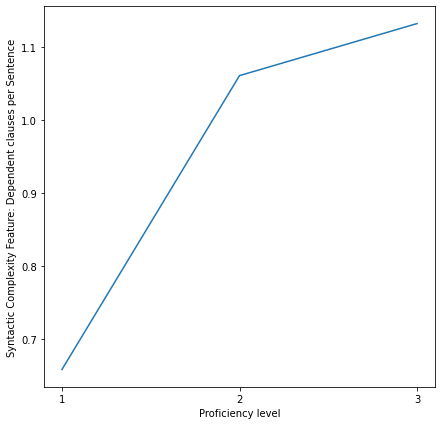

 
Syntactic Complexity Feature: Mean Length of Clause


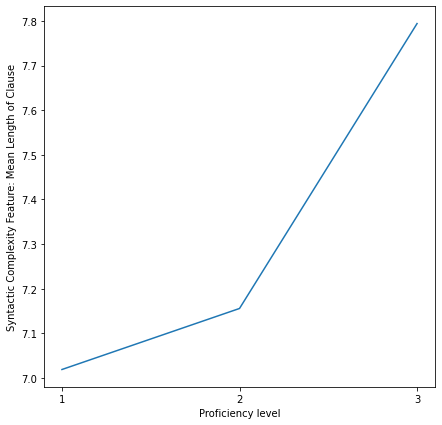

 
Syntactic Complexity Feature: Mean Length of Complex T-unit


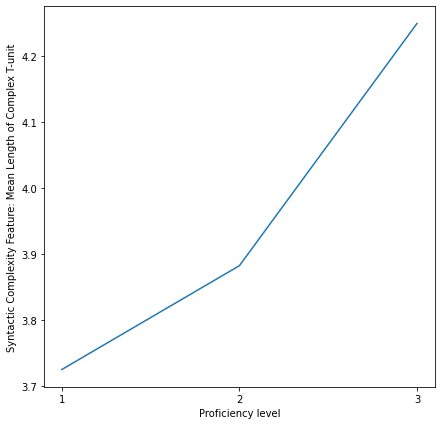

 
Syntactic Complexity Feature: Mean Length of Noun Phrase


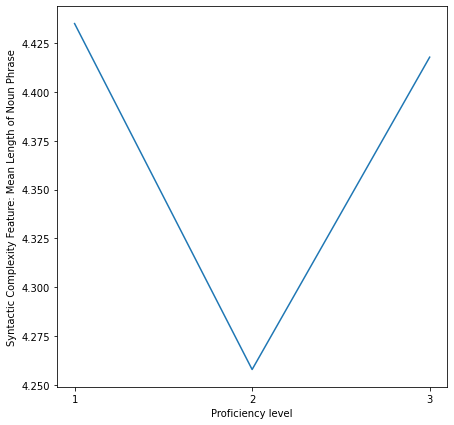

 
Syntactic Complexity Feature: Mean Length of Prepositional Phrase


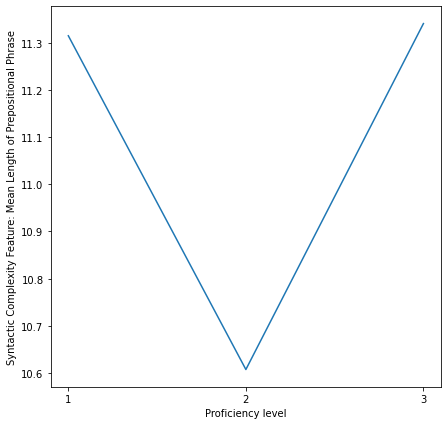

 
Syntactic Complexity Feature: Mean Length of T-unit


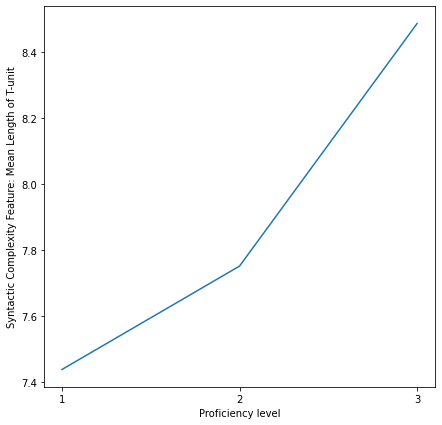

 
Syntactic Complexity Feature: Noun Phrases per Sentence


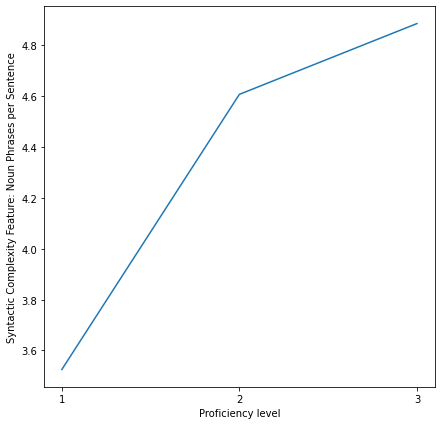

 
Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase


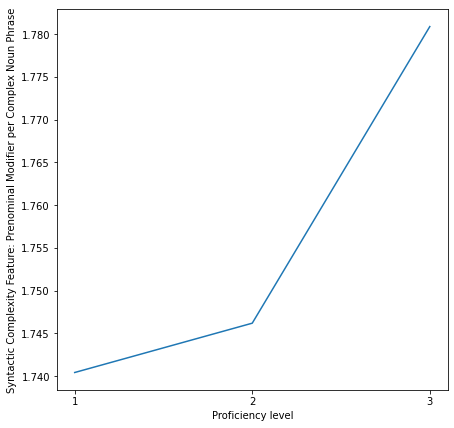

 
Syntactic Complexity Feature: Prepositional Phrases per Sentence


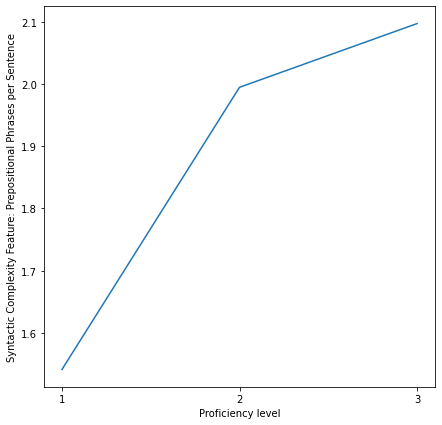

 
Syntactic Complexity Feature: Relative Clauses per Sentence


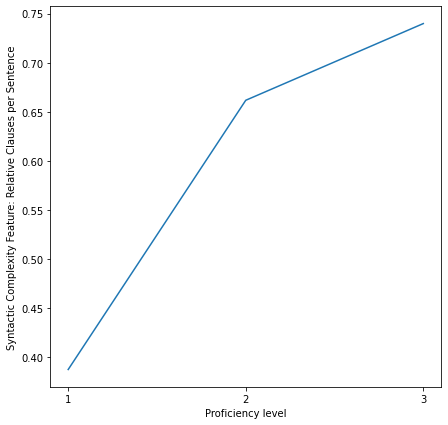

 
Syntactic Complexity Feature: Sentence Complexity Ratio


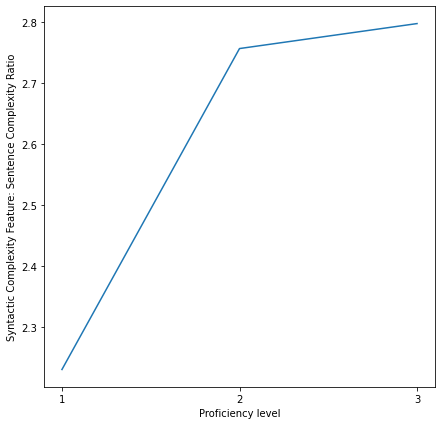

 
Syntactic Complexity Feature: Verb Cluster per Sentence


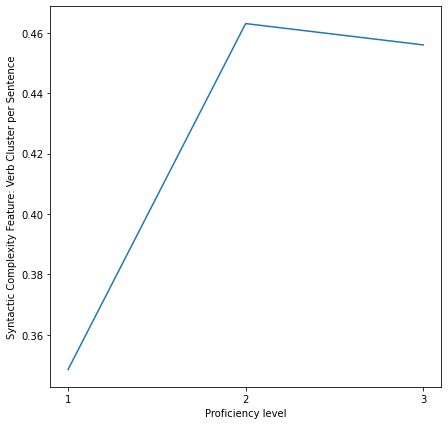

 
Syntactic Complexity Feature: Verb Phrases per Sentence


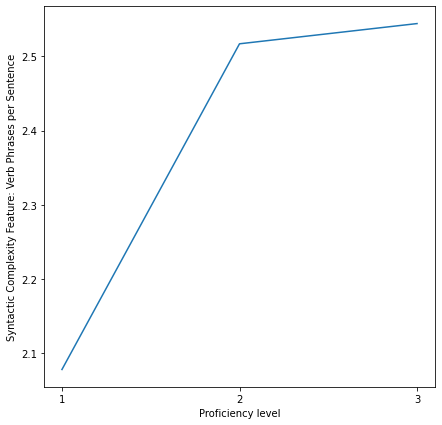

 
Syntactic Complexity Feature: e-que Cleft per VP


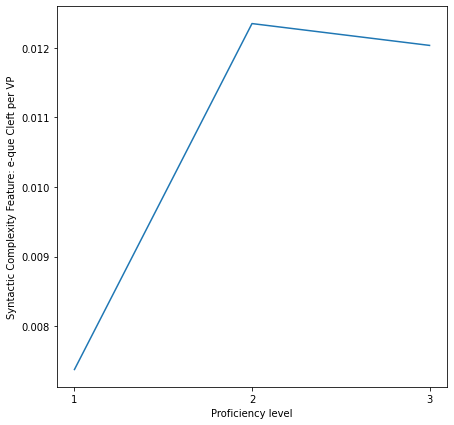

In [20]:
for feature in syntactic:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")

In [23]:
cohesion = ['Number of Connectives: Mendes Additive Connectives',
'Number of Connectives: Mendes All Connectives',
'Number of Connectives: Mendes Causal Connectives',
'Number of Connectives: Mendes Single-Word Connectives',
'Number of Connectives: Mendes Temporal Connectives',
'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Cohesive Complexity Feature: Mendes All Connectives per Token',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token',
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


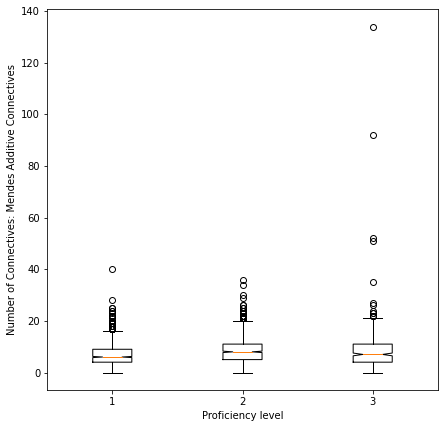

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


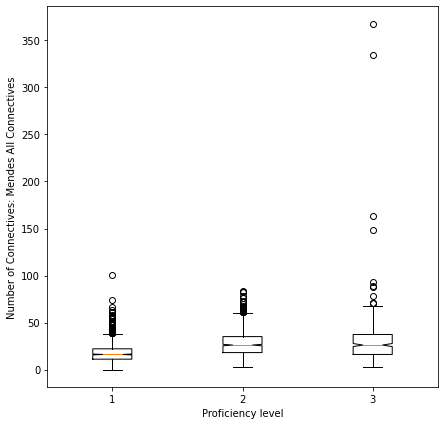

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


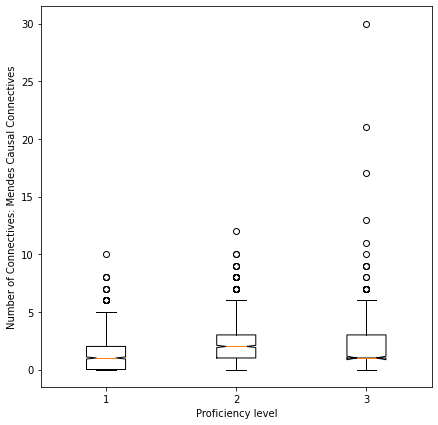

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


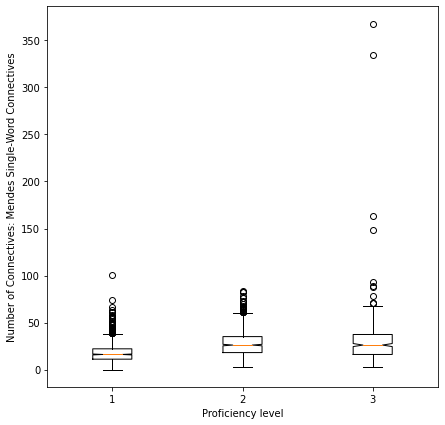

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


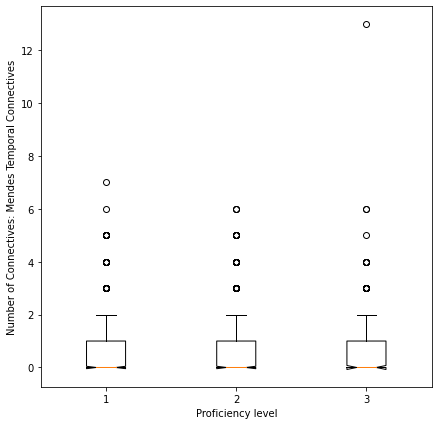

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


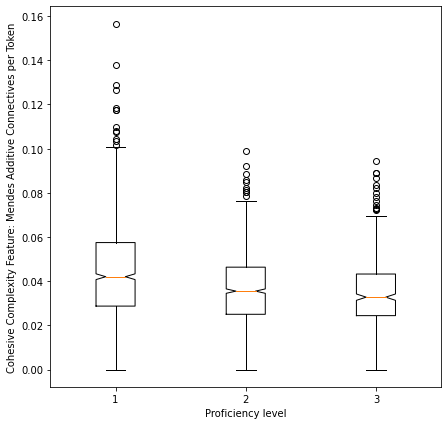

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


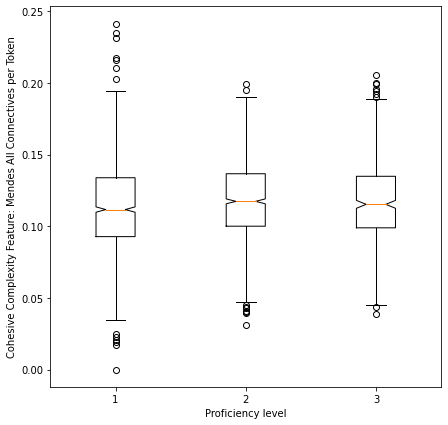

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


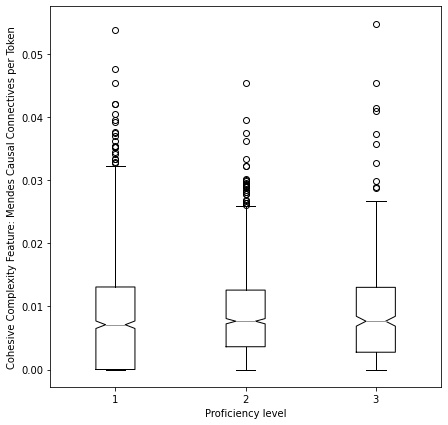

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


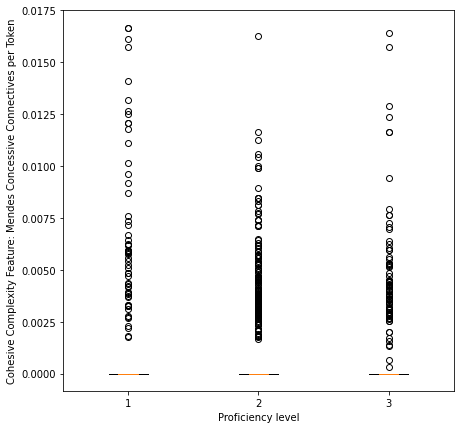

In [24]:
for feature in cohesion:
  a = df.loc[df['Proficiency'] == 1, feature]
  b = df.loc[df['Proficiency'] == 2, feature]
  c = df.loc[df['Proficiency'] == 3, feature]
  columns = [a, b, c]
  plt.rcParams["figure.figsize"] = (7,7)
  fig, ax = plt.subplots()
  #plt.ylim(0, 1300)
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  ax.boxplot(columns, notch=True, showfliers=True)
  plt.show()

Number of Connectives: Mendes Additive Connectives


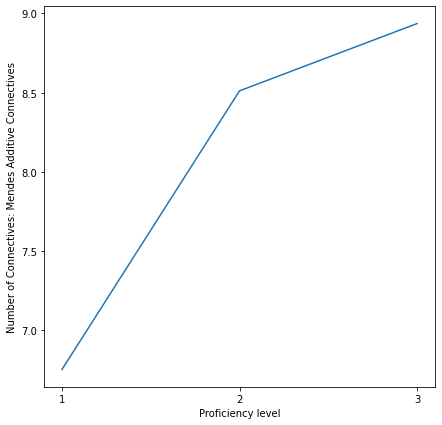

 
Number of Connectives: Mendes All Connectives


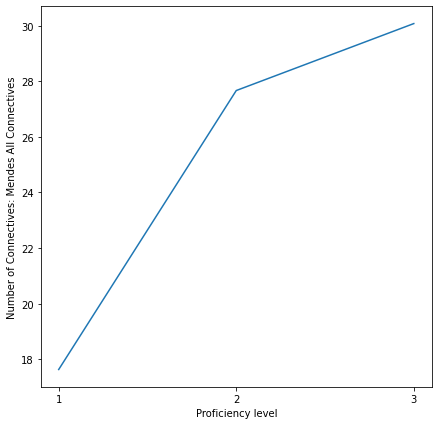

 
Number of Connectives: Mendes Causal Connectives


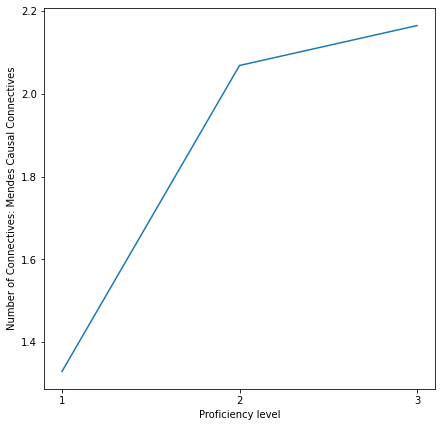

 
Number of Connectives: Mendes Single-Word Connectives


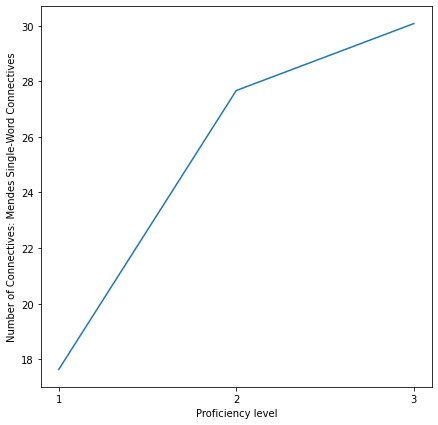

 
Number of Connectives: Mendes Temporal Connectives


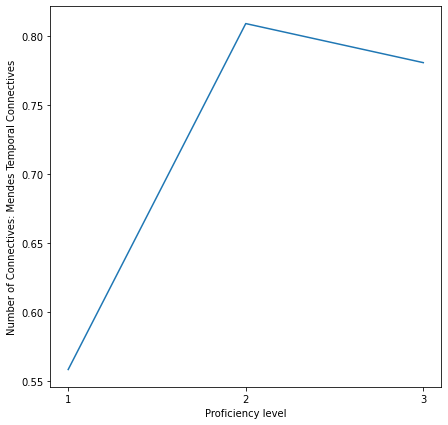

 
Cohesive Complexity Feature: Mendes Additive Connectives per Token


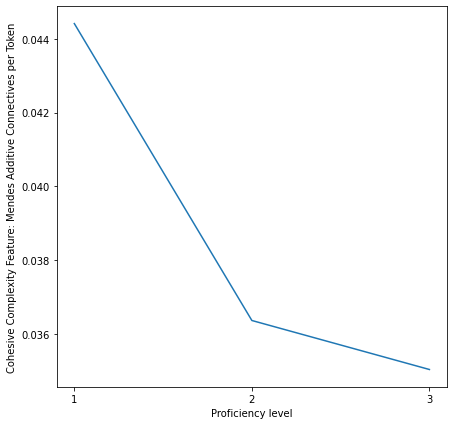

 
Cohesive Complexity Feature: Mendes All Connectives per Token


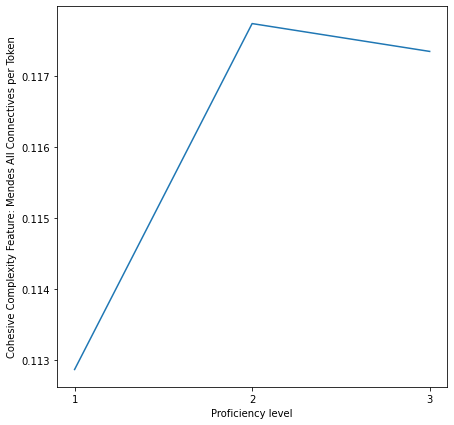

 
Cohesive Complexity Feature: Mendes Causal Connectives per Token


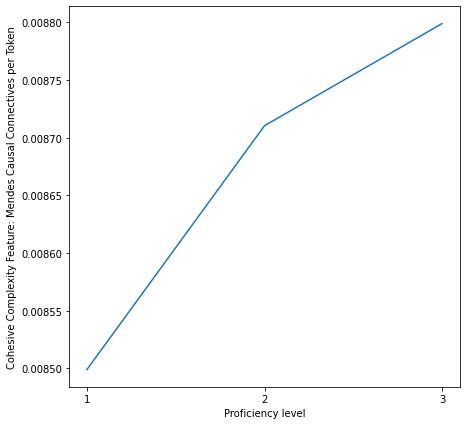

 
Cohesive Complexity Feature: Mendes Concessive Connectives per Token


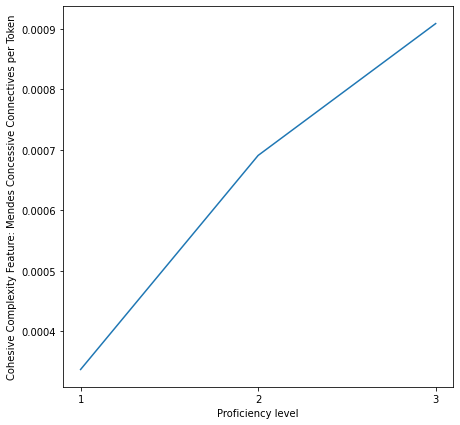

In [25]:
for feature in cohesion:
  print(feature)
  df.groupby(['Proficiency'])[feature].mean().plot()
  plt.ylabel(feature)
  plt.xlabel('Proficiency level')
  plt.xticks(range(1, 4))
  plt.show()
  print(" ")